<a href="https://www.kaggle.com/code/robertnyaranga/foresct-temperature-ocean-arima-sarima?scriptVersionId=254626061" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Time Series - Forecast global temperature</b></div>

<div align="center">
    <img src="https://img.freepik.com/vetores-gratis/correntes-oceanicas-no-fundo-do-mapa-mundial_1308-62261.jpg?t=st=1732041086~exp=1732044686~hmac=ba34eb3e9d3d4ceb21efdc74cab9548d87588fb023c1dd18c06a3bf12320a9a2&w=740" />
</div>

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 1 - Business Problem</b></div>

**Business Problem: Anticipation and Mitigation of Economic and Environmental Impacts Caused by Global Warming**

**Objective:** Use historical global temperature data to build a long-term temperature trend forecasting model, analyzing the impact on specific sectors such as agriculture, tourism, and infrastructure. The aim is to provide insights that can guide mitigation and adaptation strategies, helping governments and companies prepare for the future impacts of climate change in different regions and industries.

**Components for Analysis:**

1. **Time Trend Analysis:** Analyze trends in average, minimum, and maximum temperatures over the years by region (country, state, city). Assess seasonal variations and anomalies that may suggest accelerated climate change in certain areas.

2. **Temperature Forecasting with Time Series Models:** Develop a temperature forecasting model for the next 10, 20, and 50 years, highlighting regions with the highest warming trends. Methods like ARIMA, Prophet, or LSTM neural networks could be used to predict future changes in global and regional temperatures.

3. **Risk and Opportunity Mapping:** Based on temperature forecasts, identify vulnerable regions to environmental impacts (e.g., sea level rise in coastal areas) and economic sectors that are most exposed (such as agriculture, which depends on climate).

4. **Cost Estimation and Infrastructure Planning:** Assess expected economic impacts, such as increased energy costs due to cooling demand and potential agricultural losses.

In [1]:
# Installing packages
!pip install watermark
!pip install pmdarima
!pip install folium
!pip install geopandas 
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 66.6 MB/s eta 0:00:00:00:0100:01


In [2]:
# Import of libraries

# System libraries
import re
import string
import unicodedata
import itertools
from collections import Counter

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Time Series
import pmdarima as pm
from prophet import Prophet
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.10.14
Author: Library versions

sklearn    : 1.2.2
numpy      : 1.26.4
matplotlib : 3.7.5
pandas     : 2.2.3
re         : 2.2.1
plotly     : 5.22.0
platform   : 1.0.8
pmdarima   : 2.0.4
watermark  : 2.5.0
prophet    : 1.1.5
seaborn    : 0.12.2
statsmodels: 0.14.2



# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 2 - Database</b></div>

In [3]:
data_1 = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv")
data_3 = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv")
data_4 = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv")
data_5 = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv")
df_country = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv")

In [4]:
data_1.head()

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E

In [5]:
data_1.tail()

dt  AverageTemperature  AverageTemperatureUncertainty  \
8599207  2013-05-01              11.464                          0.236   
8599208  2013-06-01              15.043                          0.261   
8599209  2013-07-01              18.775                          0.193   
8599210  2013-08-01              18.025                          0.298   
8599211  2013-09-01                 NaN                            NaN   

           City      Country Latitude Longitude  
8599207  Zwolle  Netherlands   52.24N     5.26E  
8599208  Zwolle  Netherlands   52.24N     5.26E  
8599209  Zwolle  Netherlands   52.24N     5.26E  
8599210  Zwolle  Netherlands   52.24N     5.26E  
8599211  Zwolle  Netherlands   52.24N     5.26E

In [6]:
data_1.shape

(8599212, 7)

In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [8]:
data_1.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [9]:
# Convert the 'dt' column to datetime format
data_1['dt'] = pd.to_datetime(data_1['dt'])

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 3 - Data cleaning</b></div>

In [10]:
data_1 = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv")
data_3 = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv")
data_4 = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv")
data_5 = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv")
df_country = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv")

In [11]:
# Check for missing values in each column data 1
missing_values = data_1.isnull().sum()
print("Missing values per column in the dataset - data_1:\n", missing_values)
print()
# Check for missing values in each column data 2
missing_values = df_country.isnull().sum()
print("Missing values per column in the dataset - data 2:\n", missing_values)
print()
# Check for missing values in each column data 3
missing_values = data_3.isnull().sum()
print("Missing values per column in the dataset - data 3:\n", missing_values)
print()
# Check for missing values in each column data 4
data_4 = data_4.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
missing_values = data_4.isnull().sum()
print("Missing values per column in the dataset - data 4:\n", missing_values)
print()
# Check for missing values in each column data 5
# Check for missing values in each column
missing_values = data_5.isnull().sum()
print("Missing values per column in the dataset - data 5:\n", missing_values)

Missing values per column in the dataset - data_1:
 dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

Missing values per column in the dataset - data 2:
 dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

Missing values per column in the dataset - data 3:
 dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

Missing values per column in the dataset - data 4:
 dt                               0
Averag

In [12]:
# Remove rows with missing values in the main temperature columns for data 1
data_1 = data_1.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
missing_values = data_1.isnull().sum()
print("Missing values per column in the dataset - data_1:\n", missing_values)
print()

# Remove rows with missing values in the main temperature columns for data 2
df_country = df_country.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
missing_values = df_country.isnull().sum()
print("Missing values per column in the dataset - data_2:\n", missing_values)
print()

# Remove rows with missing values in the main temperature columns for data 3
data_3 = data_3.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
missing_values = data_3.isnull().sum()
print("Missing values per column in the dataset - data_3:\n", missing_values)
print()

# Remove rows with missing values in the main temperature columns for data 4
data_4 = data_4.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
missing_values = data_4.isnull().sum()
print("Missing values per column in the dataset - data_4:\n", missing_values)
print()

# Remove rows with missing values in the main temperature columns for data 5
data_5 = data_5.dropna(subset=['LandAverageTemperature', 'LandAverageTemperatureUncertainty', 'LandMaxTemperature',
                              'LandMaxTemperatureUncertainty', 'LandMinTemperature', 'LandMinTemperatureUncertainty',
                              'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty'])
missing_values = data_5.isnull().sum()
print("Missing values per column in the dataset - data_5:\n", missing_values)

Missing values per column in the dataset - data_1:
 dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

Missing values per column in the dataset - data_2:
 dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

Missing values per column in the dataset - data_3:
 dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

Missing values per column in the dataset - data_4:
 dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
State          

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 4 - Exploratory data analysis</b></div>



1. **What are the global average temperature trends over the past centuries?**
   - **Answer with Python:** Using libraries like `pandas` and `matplotlib`, you can calculate and visualize global average temperature trends over time. Using a time series, you can apply smoothing (rolling mean) or decomposition to identify seasonal and long-term trends.

2. **Is there a correlation between rising temperatures and specific regions (e.g., countries or cities)?**
   - **Answer with Python:** Group the data by country, state, or city and calculate the annual average temperature for each region. Use `matplotlib` or `seaborn` to create scatter plots or heatmaps to visualize the temperature correlation across different regions.

3. **Which regions show the highest temperature increase in recent decades?**
   - **Answer with Python:** Filter the dataset for recent decades and calculate the temperature change rate for each region. Sort the regions by the rate of increase and visualize the hottest regions with bar charts or maps.

4. **How can we forecast global and regional temperatures for the coming years?**
   - **Answer with Python:** Split the data into training and test periods, and use time series models like ARIMA, Prophet, or LSTM neural networks to forecast temperature. These models can be trained using libraries such as `statsmodels`, `fbprophet`, or `tensorflow`.

5. **What is the relationship between temperature and uncertainty variables over time?**
   - **Answer with Python:** Use the Uncertainty column along with temperatures. You can use line and bar charts to compare uncertainty variation over the years and investigate if there is any relationship with measurement changes.

6. **Have maximum and minimum temperatures consistently increased over time?**
   - **Answer with Python:** Filter the data for `LandMaxTemperature` and `LandMinTemperature` and calculate the annual average for each variable. Create line charts to compare the evolution of maximum and minimum temperatures over time.

7. **Which periods and regions have the highest uncertainties in temperature measurements?**
   - **Answer with Python:** Use the `AverageTemperatureUncertainty` column and analyze the average uncertainty by year and region. Bar or scatter plots can show periods and regions with the highest uncertainties in temperature measurements.

8. **What is the temperature difference between the land average and the land-ocean average?**
   - **Answer with Python:** Using the `LandAverageTemperature` and `LandAndOceanAverageTemperature` columns, you can calculate the difference between the two averages over time. Visualize this difference with a line chart to observe how isting you want to perform.

**Quest 1** What are the global average temperature trends over the past centuries?

In [13]:
# Database
data_home2 = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv")

# Convert the 'dt' column to datetime format
data_home2['dt'] = pd.to_datetime(data_home2['dt'])

# Extract the year from the 'dt' column
data_home2['Year'] = data_home2['dt'].dt.year

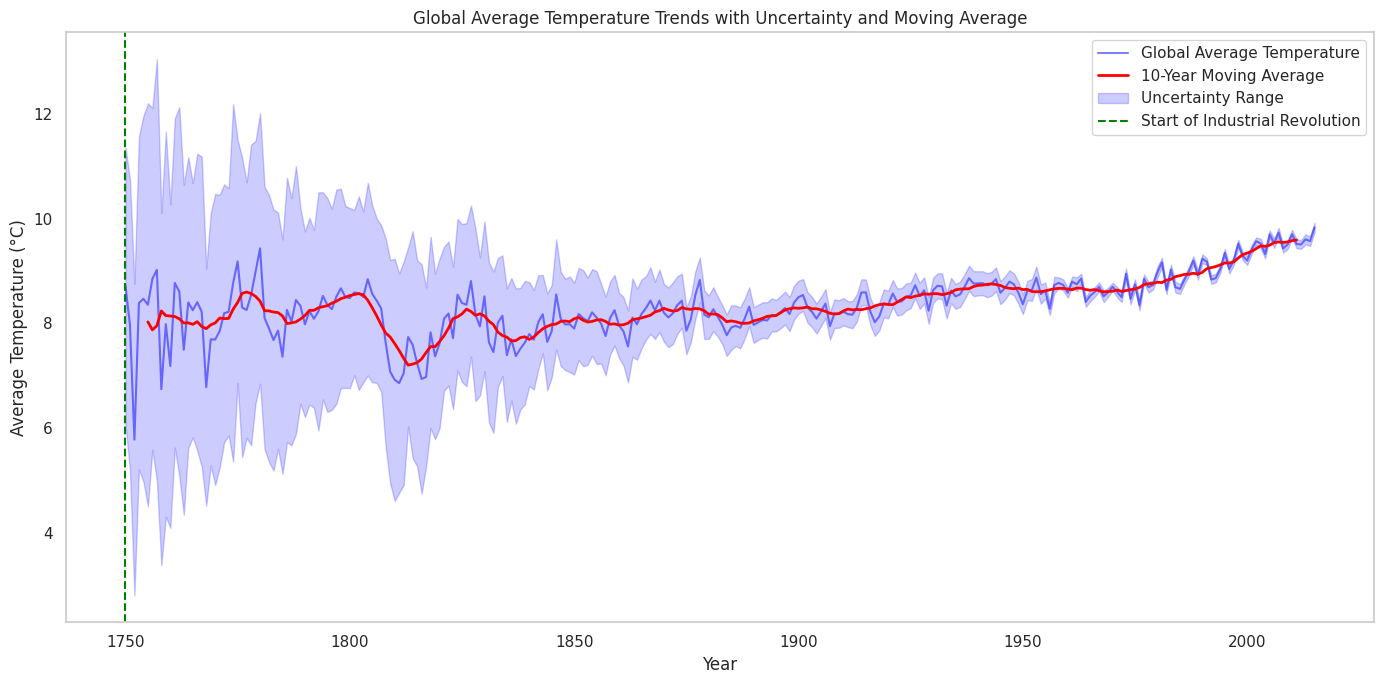

In [14]:
# Group by year and calculate the average temperature for each year
annual_avg_temp = data_home2.groupby('Year')['LandAverageTemperature'].mean()
annual_temp_uncertainty = data_home2.groupby('Year')['LandAverageTemperatureUncertainty'].mean()

# Apply a moving average to smooth fluctuations
smoothed_temp = annual_avg_temp.rolling(window=10, center=True).mean()

# Plotting
plt.figure(figsize=(14, 7))

# Original data
plt.plot(annual_avg_temp, label='Global Average Temperature', color='blue', alpha=0.5)

# Smoothed data
plt.plot(smoothed_temp, label='10-Year Moving Average', color='red', linewidth=2)

# Add uncertainty as a shaded area
plt.fill_between(
    annual_avg_temp.index,
    annual_avg_temp - annual_temp_uncertainty,
    annual_avg_temp + annual_temp_uncertainty,
    color='blue',
    alpha=0.2,
    label='Uncertainty Range'
)

# Highlight specific periods (e.g., Industrial Revolution start)
plt.axvline(x=1750, color='green', linestyle='--', label='Start of Industrial Revolution')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Global Average Temperature Trends with Uncertainty and Moving Average')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Save and show the plot
plt.tight_layout()
plt.savefig('enhanced_temperature_trends.png')
plt.grid(False)
plt.show()

**Quest 2** Is there a correlation between rising temperatures and specific regions (e.g., countries or cities)?

In [15]:
# Convert 'dt' column to datetime format and extract the year
df_country['dt'] = pd.to_datetime(df_country['dt'])
df_country['Year'] = df_country['dt'].dt.year

# Remove rows with missing temperature values
df_country = df_country.dropna(subset=['AverageTemperature'])

# Calculate annual average temperature by country
annual_avg_temp_country = df_country.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index()

# Filter specific countries for analysis
selected_countries = ['United States', 'Brazil', 'China', 'India', 'Australia']
filtered_data = annual_avg_temp_country[annual_avg_temp_country['Country'].isin(selected_countries)]
filtered_data.head(n=20)

Country  Year  AverageTemperature
2475  Australia  1852           20.188500
2476  Australia  1853           20.958250
2477  Australia  1854           20.284778
2478  Australia  1855           20.798636
2479  Australia  1856           21.148333
2480  Australia  1857           20.966417
2481  Australia  1858           21.329833
2482  Australia  1859           21.188917
2483  Australia  1860           21.245500
2484  Australia  1861           21.197500
2485  Australia  1862           21.155417
2486  Australia  1863           21.309000
2487  Australia  1864           21.044250
2488  Australia  1865           21.217833
2489  Australia  1866           21.417000
2490  Australia  1867           21.643833
2491  Australia  1868           21.447583
2492  Australia  1869           21.521583
2493  Australia  1870           21.428333
2494  Australia  1871           21.459667

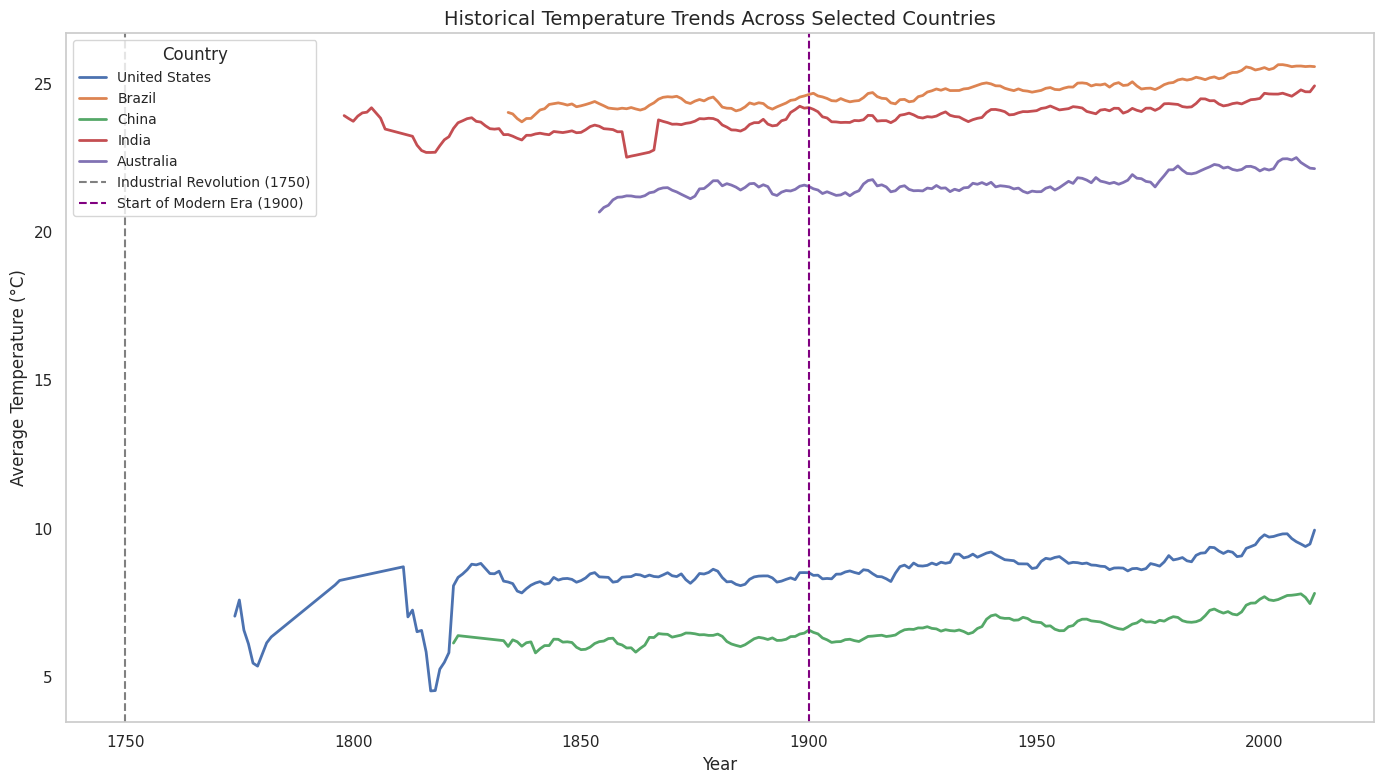

In [16]:
# Enhanced visualization of temperature trends with improvements
plt.figure(figsize=(14, 8))

# Applying a moving average for smoothing (e.g., 5-year window)
for country in selected_countries:
    country_data = filtered_data[filtered_data['Country'] == country]
    smoothed_temp = country_data['AverageTemperature'].rolling(window=5, center=True).mean()
    plt.plot(country_data['Year'], smoothed_temp, label=country, linewidth=2)

# Adding annotations for key historical events
plt.axvline(x=1750, color='gray', linestyle='--', label='Industrial Revolution (1750)')
plt.axvline(x=1900, color='purple', linestyle='--', label='Start of Modern Era (1900)')

# Customizing title, labels, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.title('Historical Temperature Trends Across Selected Countries', fontsize=14)
plt.legend(title="Country", fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

# Adding a more distinct color palette
plt.tight_layout()
plt.grid(False)
plt.show()

In [17]:
correlations = {}
for country in selected_countries:
    country_data = annual_avg_temp_country[annual_avg_temp_country['Country'] == country]
    correlation = country_data['Year'].corr(country_data['AverageTemperature'])
    correlations[country] = correlation

print("Correlation between Year and Average Temperature:")
for country, corr_value in correlations.items():
    print(f"{country}: {corr_value:.2f}")

Correlation between Year and Average Temperature:
United States: 0.49
Brazil: 0.85
China: 0.74
India: 0.59
Australia: 0.66


**Quest 3** Which regions show the highest temperature increase in recent decades ?

In [18]:
# Convert the 'dt' column to datetime format and extract the year
df_country['dt'] = pd.to_datetime(df_country['dt'])
df_country['Year'] = df_country['dt'].dt.year

# Remove data with missing temperatures
df_country = df_country.dropna(subset=['AverageTemperature'])

# Filter for the last decades (example: 1980 to the present)
recent_data = df_country[df_country['Year'] >= 1980]

# Calculate the annual average temperature by country
annual_avg_temp_country = recent_data.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index()

# Calculate the rate of temperature change for each country
# To do this, calculate the slope of the trend line for each country
temperature_trends = {}

for country in annual_avg_temp_country['Country'].unique():
    country_data = annual_avg_temp_country[annual_avg_temp_country['Country'] == country]
    if len(country_data) > 1:  # Ensure there is enough data for the calculation
        # Calculate the rate of change based on linear regression
        slope = (country_data['AverageTemperature'].iloc[-1] - country_data['AverageTemperature'].iloc[0]) / (country_data['Year'].iloc[-1] - country_data['Year'].iloc[0])
        temperature_trends[country] = slope

# Sort the countries by the highest rate of temperature increase
sorted_trends = sorted(temperature_trends.items(), key=lambda x: x[1], reverse=True)
annual_avg_temp_country

Country  Year  AverageTemperature
0     Afghanistan  1980           14.887333
1     Afghanistan  1981           14.860083
2     Afghanistan  1982           13.733083
3     Afghanistan  1983           14.614833
4     Afghanistan  1984           14.245833
...           ...   ...                 ...
8223        Åland  2009            6.489083
8224        Åland  2010            4.861917
8225        Åland  2011            7.170750
8226        Åland  2012            6.063917
8227        Åland  2013            6.229750

[8228 rows x 3 columns]

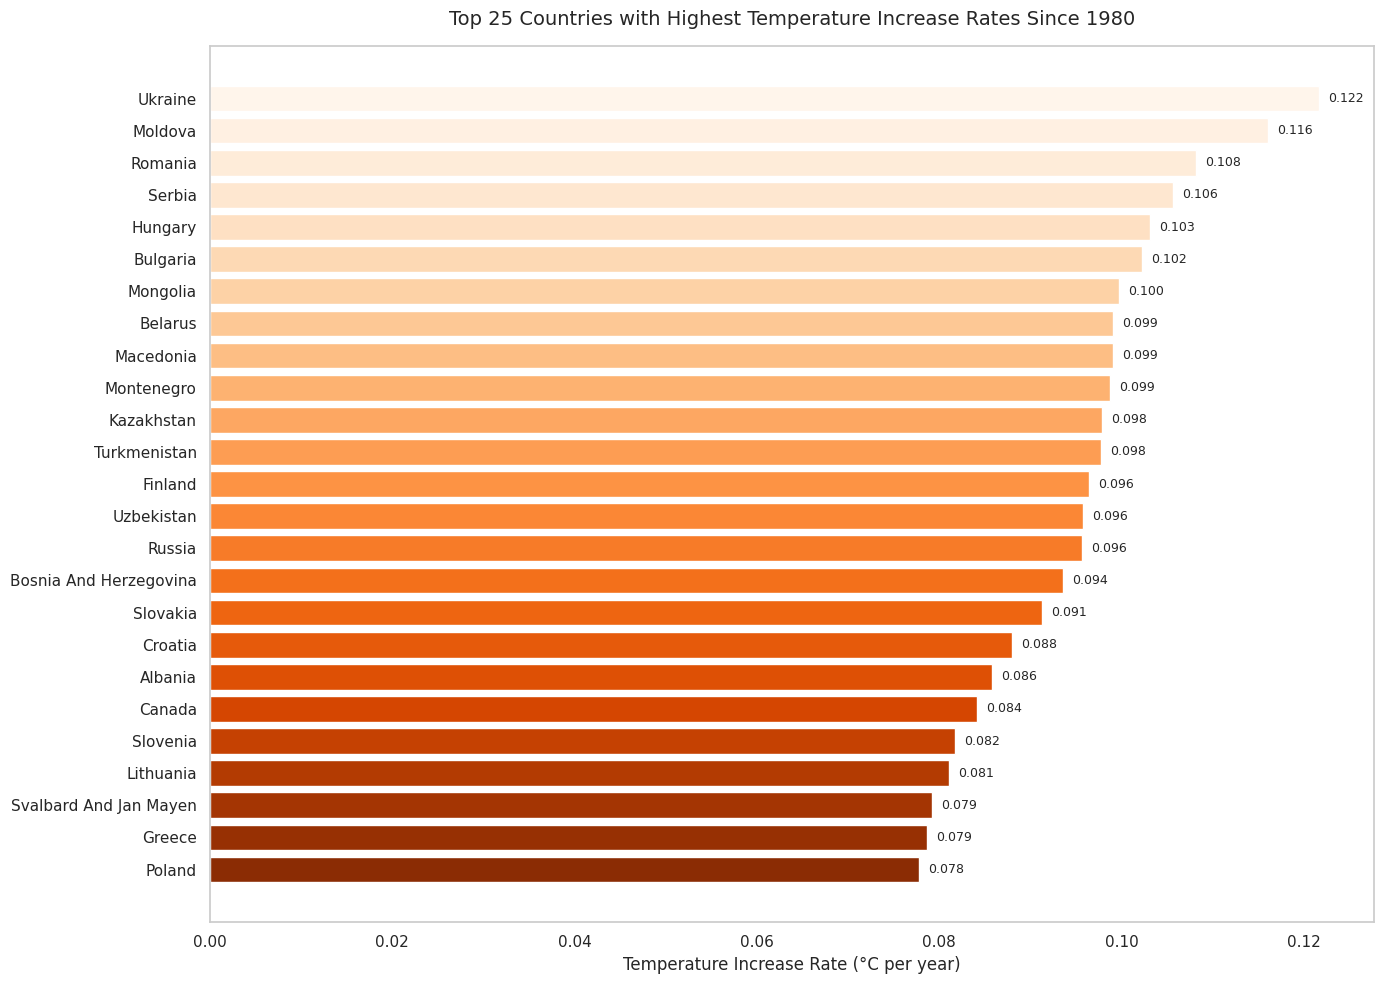

In [19]:
# Improved visualization with enhancements

# Selecting the top 25 countries with the highest temperature increase rates
top_countries = sorted_trends[:25]
countries = [country for country, trend in top_countries]
trends = [trend for country, trend in top_countries]

plt.figure(figsize=(14, 10))

# Use a color gradient
colors = plt.cm.Oranges([i / len(countries) for i in range(len(countries))])
bars = plt.barh(countries, trends, color=colors)

# Add exact values at the end of each bar
for bar, trend in zip(bars, trends):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height() / 2,
             f'{trend:.3f}', va='center', fontsize=9)

# Enhancing labels and title
plt.xlabel('Temperature Increase Rate (°C per year)', fontsize=12)
plt.title('Top 25 Countries with Highest Temperature Increase Rates Since 1980', fontsize=14, pad=15)

# Adding grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Invert the y-axis for better readability
plt.gca().invert_yaxis()

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.grid(False)
plt.show()

**Quest 4** What is the relationship between temperature and uncertainty variables over time?

<Figure size 1400x600 with 0 Axes>

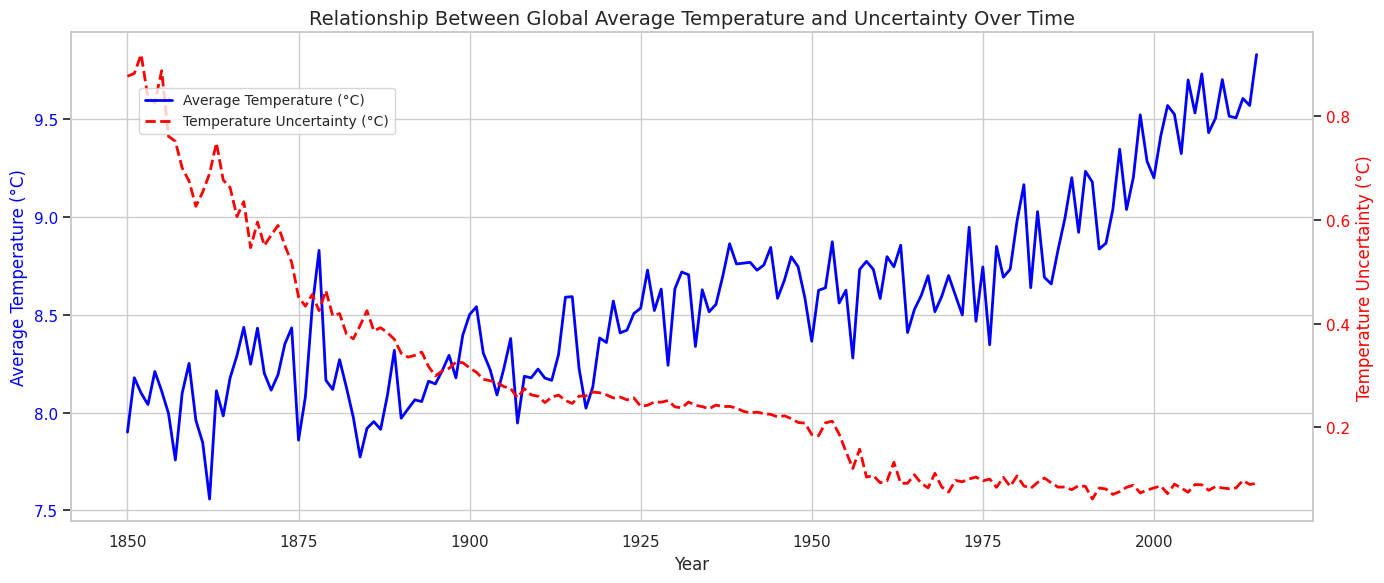

In [20]:
# Convert 'dt' column to datetime format and extract the year
data_5['dt'] = pd.to_datetime(data_5['dt'])
data_5['Year'] = data_5['dt'].dt.year

# Remove rows with missing values in temperature and uncertainty
data_5 = data_5.dropna(subset=['LandAverageTemperature', 'LandAverageTemperatureUncertainty'])

# Group by year to calculate annual average temperature and uncertainty
annual_data = data_5.groupby('Year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty']].mean().reset_index()

# Enhanced visualization of the relationship between temperature and uncertainty
plt.figure(figsize=(14, 6))

# Plot temperature on the primary axis
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(annual_data['Year'], annual_data['LandAverageTemperature'], label='Average Temperature (°C)', color='blue', linewidth=2)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Average Temperature (°C)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Add a secondary axis for uncertainty
ax2 = ax1.twinx()
ax2.plot(annual_data['Year'], annual_data['LandAverageTemperatureUncertainty'], label='Temperature Uncertainty (°C)', color='red', linestyle='--', linewidth=2)
ax2.set_ylabel('Temperature Uncertainty (°C)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and improve the legend
plt.title('Relationship Between Global Average Temperature and Uncertainty Over Time', fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.85), fontsize=10)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.grid(False)
plt.show()

In [21]:
correlation = annual_data['LandAverageTemperature'].corr(annual_data['LandAverageTemperatureUncertainty'])
print(f'Correlation between Average Temperature and Uncertainty: {correlation:.2f}')

Correlation between Average Temperature and Uncertainty: -0.68


**Quest 5** Have maximum and minimum temperatures consistently increased over time?

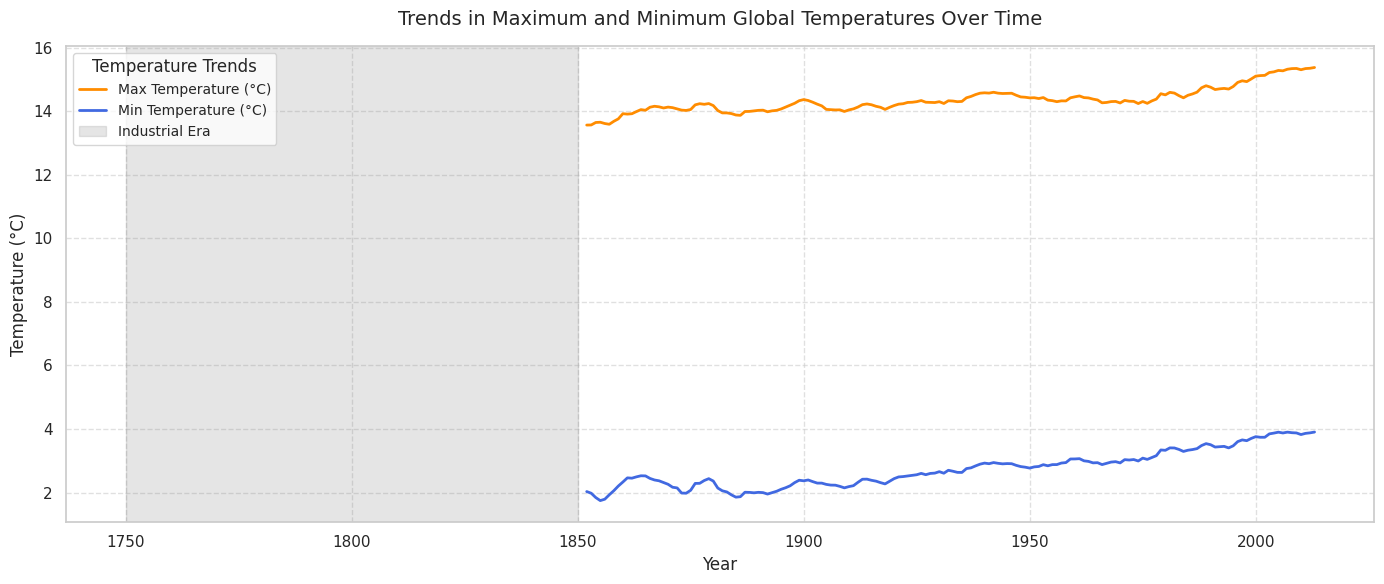

In [22]:
# Convert 'dt' column to datetime format and extract the year
data_5['dt'] = pd.to_datetime(data_5['dt'])
data_5['Year'] = data_5['dt'].dt.year

# Remove rows with missing values in max and min temperatures
data_5 = data_5.dropna(subset=['LandMaxTemperature', 'LandMinTemperature'])

# Group by year to calculate annual average max and min temperatures
annual_temp = data_5.groupby('Year')[['LandMaxTemperature', 'LandMinTemperature']].mean().reset_index()

# Enhanced visualization with suggested improvements
plt.figure(figsize=(14, 6))

# Apply a moving average for smoothing (e.g., 5-year window)
smoothed_max_temp = annual_temp['LandMaxTemperature'].rolling(window=5, center=True).mean()
smoothed_min_temp = annual_temp['LandMinTemperature'].rolling(window=5, center=True).mean()

# Plot max and min temperatures with smoothing
plt.plot(annual_temp['Year'], smoothed_max_temp, label='Max Temperature (°C)', color='darkorange', linewidth=2)
plt.plot(annual_temp['Year'], smoothed_min_temp, label='Min Temperature (°C)', color='royalblue', linewidth=2)

# Highlight specific periods (e.g., Industrial Era)
plt.axvspan(1750, 1850, color='gray', alpha=0.2, label='Industrial Era')

# Add labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Trends in Maximum and Minimum Global Temperatures Over Time', fontsize=14, pad=15)
plt.legend(title="Temperature Trends", fontsize=10, loc='upper left')

# Add grid lines and improve aesthetics
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
# Calculate the annual rate of change for maximum and minimum temperatures
annual_temp['MaxTempChange'] = annual_temp['LandMaxTemperature'].diff()
annual_temp['MinTempChange'] = annual_temp['LandMinTemperature'].diff()

# Calculate the percentage of years with a positive increase in max and min temperatures
max_increase_percentage = (annual_temp['MaxTempChange'] > 0).mean() * 100
min_increase_percentage = (annual_temp['MinTempChange'] > 0).mean() * 100

print(f'Percentage of years with increase in Max Temperature: {max_increase_percentage:.2f}%')
print(f'Percentage of years with increase in Min Temperature: {min_increase_percentage:.2f}%')

Percentage of years with increase in Max Temperature: 57.23%
Percentage of years with increase in Min Temperature: 55.42%


**Quest 6** Which periods and regions have the highest uncertainties in temperature measurements?

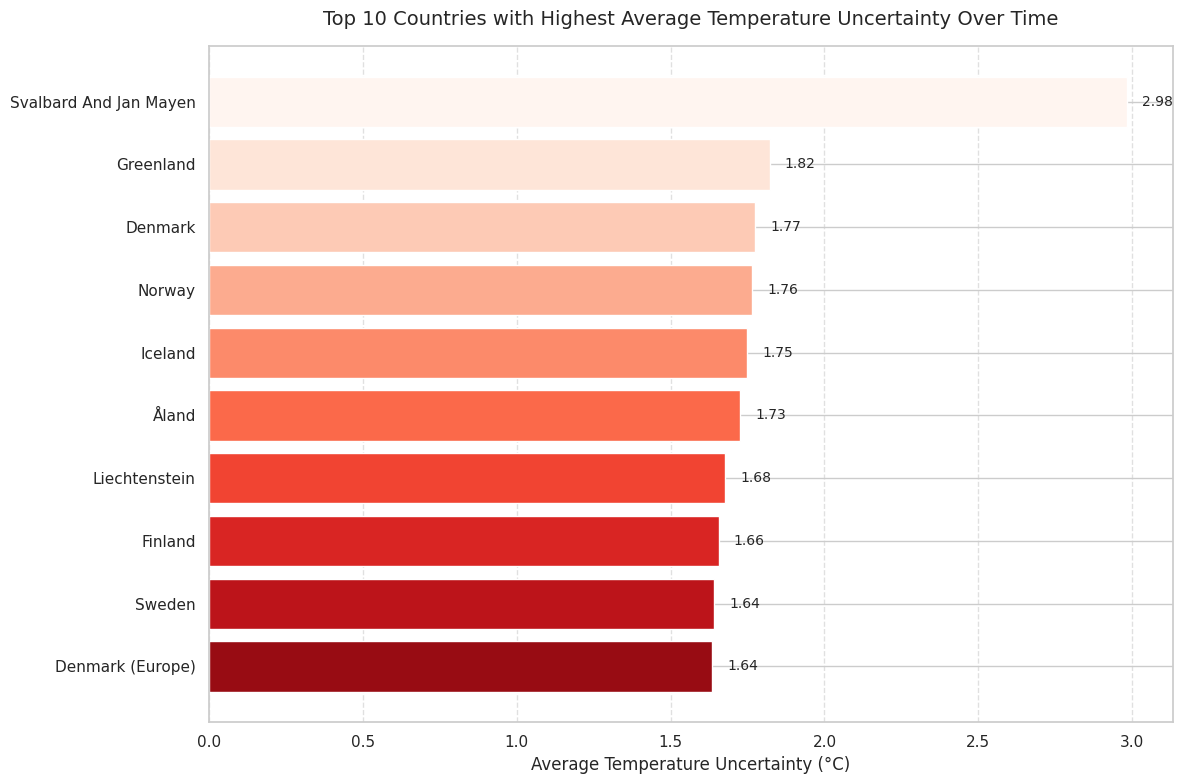

Country
Svalbard And Jan Mayen    2.982169
Greenland                 1.821422
Denmark                   1.772881
Norway                    1.763899
Iceland                   1.747089
Åland                     1.726378
Liechtenstein             1.675850
Finland                   1.655766
Sweden                    1.641920
Denmark (Europe)          1.635076
Name: AverageTemperatureUncertainty, dtype: float64

In [24]:
# Convert 'dt' column to datetime format and extract the year
df_country['dt'] = pd.to_datetime(df_country['dt'])
df_country['Year'] = df_country['dt'].dt.year

# Remove rows with missing uncertainty values
df_country = df_country.dropna(subset=['AverageTemperatureUncertainty'])

# Calculate annual average uncertainty by country
annual_uncertainty_country = df_country.groupby(['Country', 'Year'])['AverageTemperatureUncertainty'].mean().reset_index()

# Identify the 10 countries with the highest average uncertainty over the period
top_uncertainty_countries = (annual_uncertainty_country.groupby('Country')['AverageTemperatureUncertainty'].mean().nlargest(10))

# Improved visualization of countries with the highest temperature uncertainty
plt.figure(figsize=(12, 8))

# Use color gradients
colors = plt.cm.Reds([i / len(top_uncertainty_countries) for i in range(len(top_uncertainty_countries))])

# Plot horizontal bar chart
bars = plt.barh(top_uncertainty_countries.index, top_uncertainty_countries.values, color=colors)

# Add exact values at the end of each bar
for bar, value in zip(bars, top_uncertainty_countries.values):
    plt.text(value + 0.05, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center', fontsize=10)

# Add labels and title
plt.xlabel('Average Temperature Uncertainty (°C)', fontsize=12)
plt.title('Top 10 Countries with Highest Average Temperature Uncertainty Over Time', fontsize=14, pad=15)

# Add a grid for better comparison
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Invert y-axis for better readability
plt.gca().invert_yaxis()

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

top_uncertainty_countries

**Quest 7** What is the temperature difference between the land average and the land-ocean average?

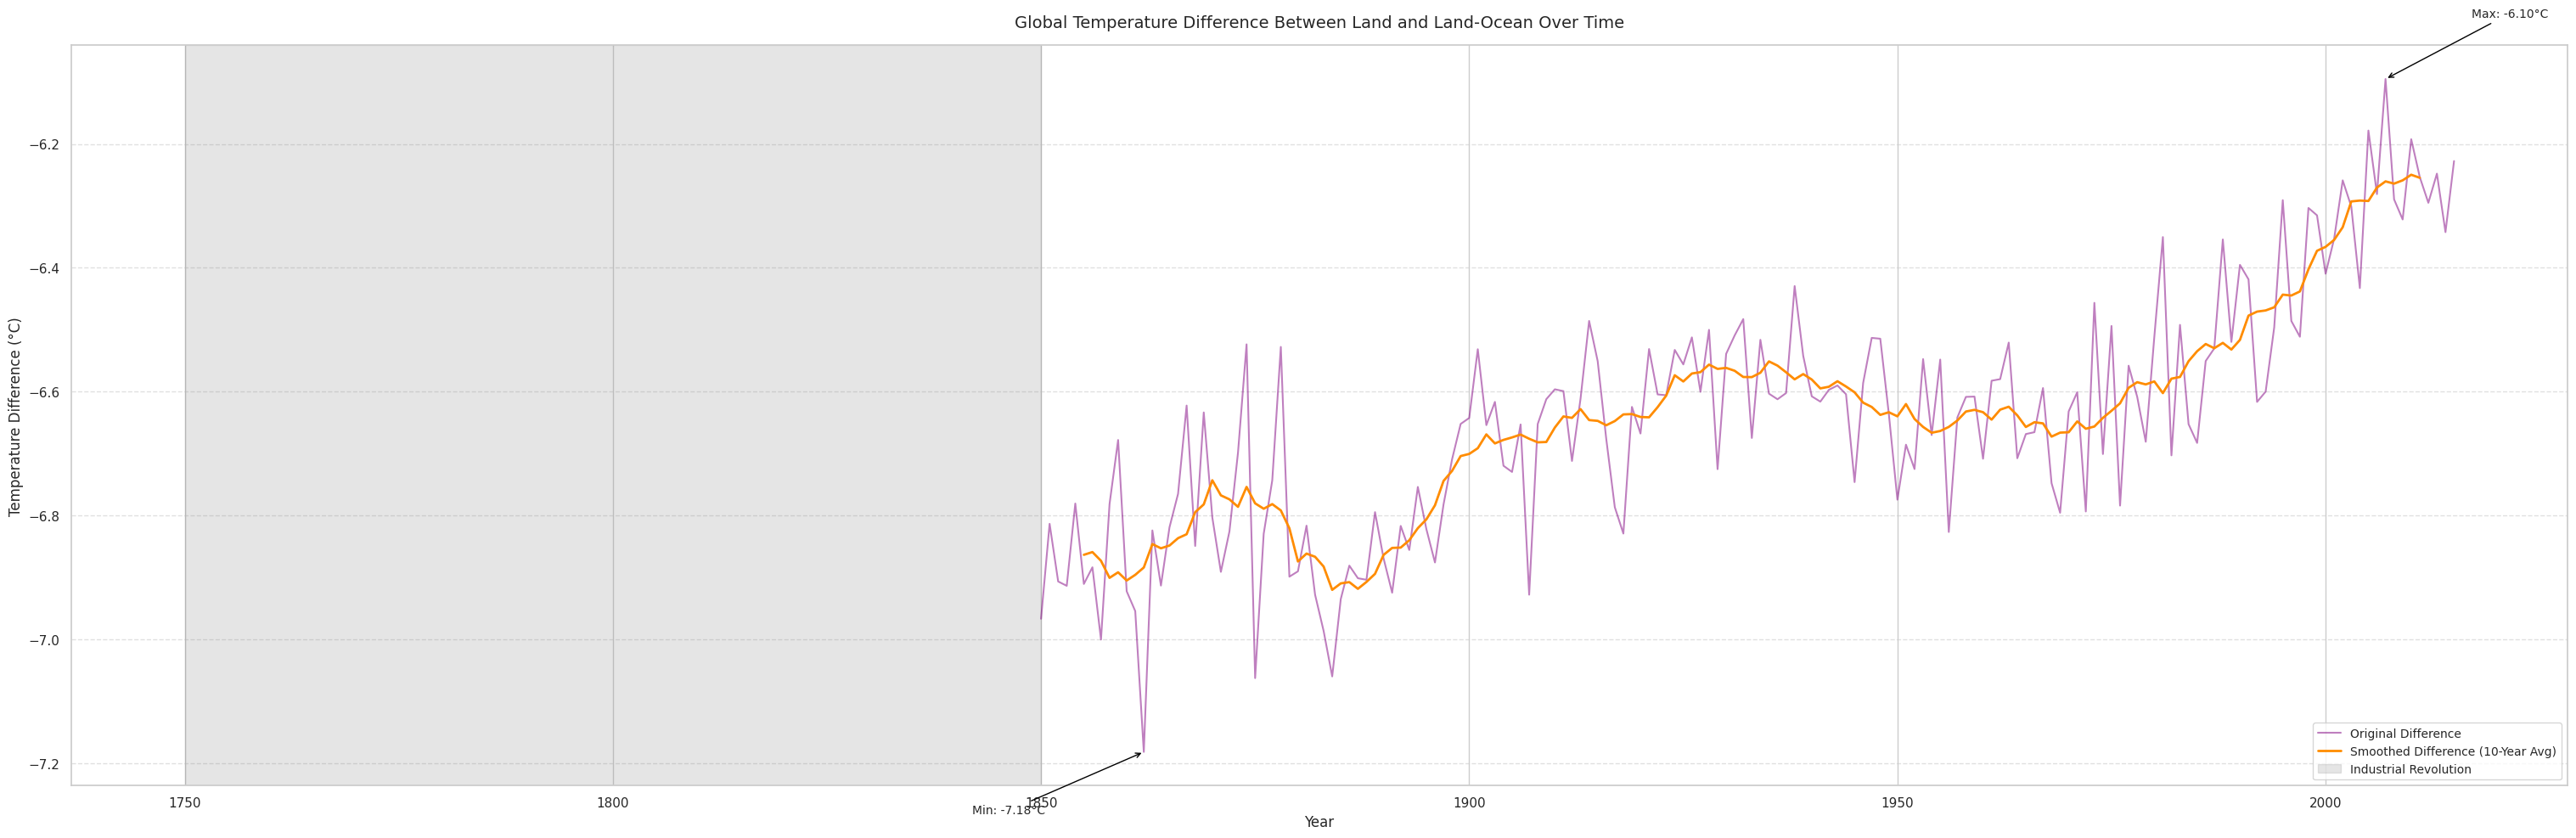

In [25]:
# Calculate the difference between land average temperature and land-ocean average temperature
data_5['TemperatureDifference'] = data_5['LandAverageTemperature'] - data_5['LandAndOceanAverageTemperature']

# Group by year to calculate the annual average temperature difference
annual_difference = data_5.groupby('Year')['TemperatureDifference'].mean().reset_index()

# Improved visualization of temperature difference with enhancements
plt.figure(figsize=(30.5, 10))

# Apply a moving average (e.g., 10 years) for smoothing
annual_difference['SmoothedDifference'] = annual_difference['TemperatureDifference'].rolling(window=10, center=True).mean()

# Plot the original data
plt.plot(annual_difference['Year'], annual_difference['TemperatureDifference'], color='purple', alpha=0.5, label='Original Difference')

# Plot the smoothed trend
plt.plot(annual_difference['Year'], annual_difference['SmoothedDifference'], color='darkorange', linewidth=2, label='Smoothed Difference (10-Year Avg)')

# Highlight specific periods (e.g., industrial revolution)
plt.axvspan(1750, 1850, color='gray', alpha=0.2, label='Industrial Revolution')

# Add annotations for key points
max_diff = annual_difference.loc[annual_difference['TemperatureDifference'].idxmax()]
min_diff = annual_difference.loc[annual_difference['TemperatureDifference'].idxmin()]
plt.annotate(f'Max: {max_diff["TemperatureDifference"]:.2f}°C', 
             xy=(max_diff['Year'], max_diff['TemperatureDifference']), 
             xytext=(max_diff['Year'] + 10, max_diff['TemperatureDifference'] + 0.1), 
             arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)
plt.annotate(f'Min: {min_diff["TemperatureDifference"]:.2f}°C', 
             xy=(min_diff['Year'], min_diff['TemperatureDifference']), 
             xytext=(min_diff['Year'] - 20, min_diff['TemperatureDifference'] - 0.1), 
             arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

# Add labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Difference (°C)', fontsize=12)
plt.title('Global Temperature Difference Between Land and Land-Ocean Over Time', fontsize=14, pad=15)
plt.legend(fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 4.1 - Data analysis focused on Brazil</b></div>

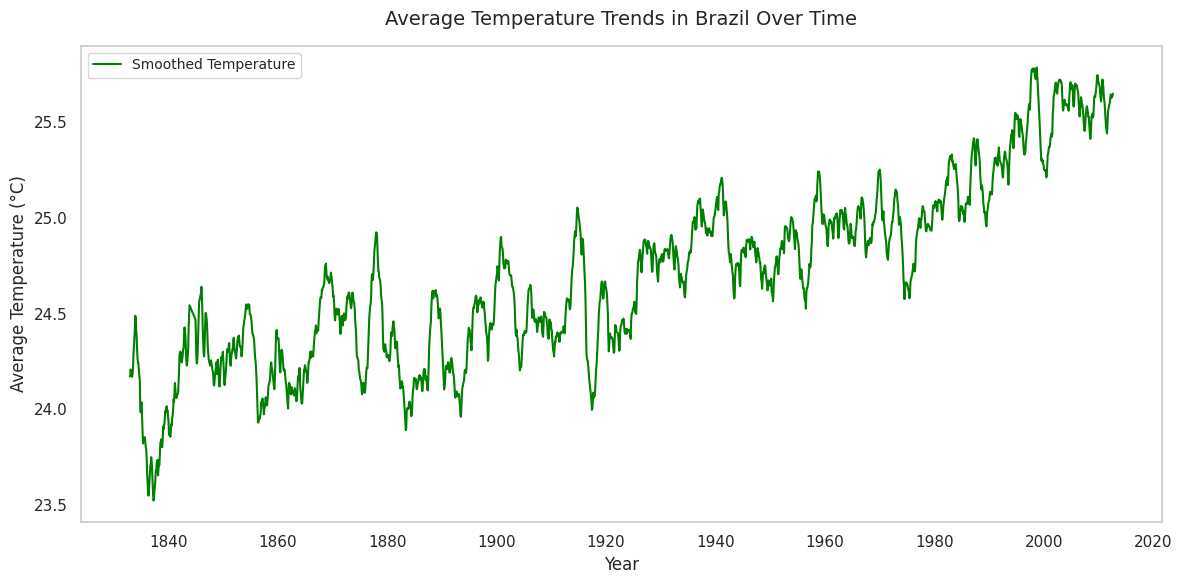

In [26]:
# Filter the data for Brazil and remove rows with missing temperature values
df_brazil = df_country[df_country['Country'] == 'Brazil'].dropna(subset=['AverageTemperature'])

# Smoothing the temperature data using a rolling average
df_brazil['SmoothedTemperature'] = df_brazil['AverageTemperature'].rolling(window=25, center=True).mean()

# Plot the smoothed temperature trend
plt.figure(figsize=(12, 6))
sns.lineplot(x="dt", y="SmoothedTemperature", data=df_brazil, color="green", label="Smoothed Temperature")

# Add annotations for key points
max_temp = df_brazil.loc[df_brazil['AverageTemperature'].idxmax()]
min_temp = df_brazil.loc[df_brazil['AverageTemperature'].idxmin()]
plt.annotate(f'Max: {max_temp["AverageTemperature"]:.2f}°C',
             xy=(max_temp['dt'], max_temp['AverageTemperature']),
             xytext=(max_temp['dt'], max_temp['AverageTemperature'] + 1),
             arrowprops=dict(arrowstyle='->', color='black'))
plt.annotate(f'Min: {min_temp["AverageTemperature"]:.2f}°C',
             xy=(min_temp['dt'], min_temp['AverageTemperature']),
             xytext=(min_temp['dt'], min_temp['AverageTemperature'] - 1),
             arrowprops=dict(arrowstyle='->', color='black'))

# Add labels, title, and grid
plt.title("Average Temperature Trends in Brazil Over Time", fontsize=14, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(fontsize=10)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.grid(False)
plt.show()

**Analyzing the Average Temperature Trend Over Time**

- We can calculate the average annual temperature in Brazil to see if there is an increasing trend.

**Step 3: Analyze the Variation of Uncertainty in the Measurements**

- We can also check the AverageTemperatureUncertainty column to understand how the uncertainty in the temperature measurements has varied over time.

**Step 4: Identify Decades with Largest Temperature Increases**

- To see if specific decades had larger temperature increases, we can calculate the average temperature for each decade.

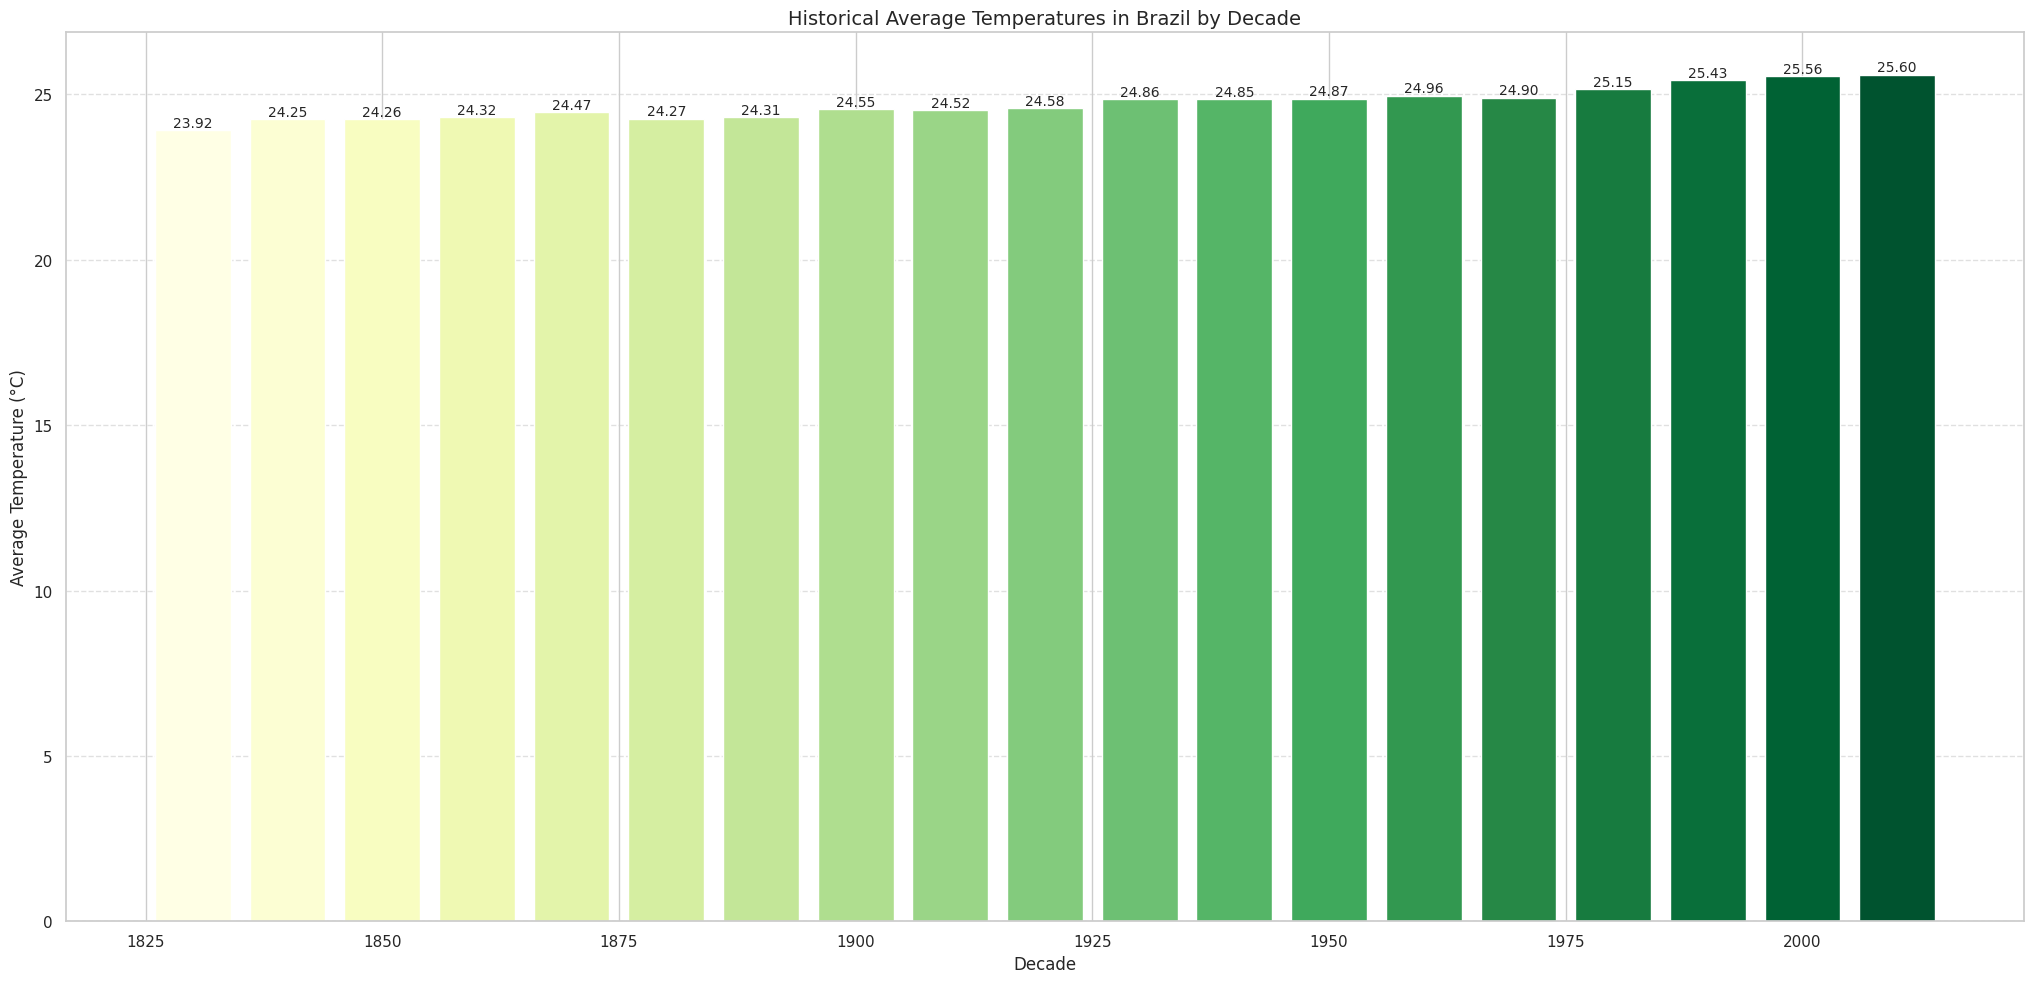

In [27]:
# Create a Decade column
df_brazil['Decade'] = (df_brazil['Year'] // 10) * 10

# Calculate the average temperature per decade in Brazil
decade_avg_temp_brazil = df_brazil.groupby('Decade')['AverageTemperature'].mean().reset_index()

# Improved visualization of average temperature by decade in Brazil
plt.figure(figsize=(20.5, 10))

# Plot the bar chart with a gradient color
colors = plt.cm.YlGn([i / len(decade_avg_temp_brazil) for i in range(len(decade_avg_temp_brazil))])
bars = plt.bar(decade_avg_temp_brazil['Decade'], decade_avg_temp_brazil['AverageTemperature'], color=colors, width=8)

# Add exact values on top of each bar
for bar, temp in zip(bars, decade_avg_temp_brazil['AverageTemperature']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f'{temp:.2f}', ha='center', fontsize=10)

# Add labels and title
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.title('Historical Average Temperatures in Brazil by Decade', fontsize=14)

# Add horizontal gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

**Step 5: Comparison between Temperatures from Different Decades**

- To understand the magnitude of climate change in Brazil, we can calculate the average temperature increase over the decades and compare the values.

In [28]:
# Calculate the average temperature increase from one decade to the next
decade_avg_temp_brazil['TempIncrease'] = decade_avg_temp_brazil['AverageTemperature'].diff()

# Display the table with the decades and the temperature increase
print(decade_avg_temp_brazil[['Decade', 'AverageTemperature', 'TempIncrease']])

    Decade  AverageTemperature  TempIncrease
0     1830           23.915208           NaN
1     1840           24.252590      0.337382
2     1850           24.258143      0.005552
3     1860           24.319183      0.061040
4     1870           24.466858      0.147675
5     1880           24.268942     -0.197917
6     1890           24.307367      0.038425
7     1900           24.548292      0.240925
8     1910           24.518492     -0.029800
9     1920           24.580733      0.062242
10    1930           24.864225      0.283492
11    1940           24.851642     -0.012583
12    1950           24.872300      0.020658
13    1960           24.964500      0.092200
14    1970           24.904792     -0.059708
15    1980           25.153125      0.248333
16    1990           25.432500      0.279375
17    2000           25.562067      0.129567
18    2010           25.597409      0.035342


**Calculate the Moving Average Climate Brazil**

In [29]:
# Convert the 'dt' column to datetime and extract the year
df_country['dt'] = pd.to_datetime(df_country['dt'])
df_country['Year'] = df_country['dt'].dt.year

# Filter data for Brazil and remove rows with missing temperature values
df_brazil = df_country[df_country['Country'] == 'Brazil'].dropna(subset=['AverageTemperature'])

# Calculate the annual average temperature in Brazil
annual_temp_brazil = df_brazil.groupby('Year')['AverageTemperature'].mean().reset_index()

# Calculate the 10-year moving average
annual_temp_brazil['10-Year Moving Average'] = annual_temp_brazil['AverageTemperature'].rolling(window=10).mean()
annual_temp_brazil.head(n=20)

Year  AverageTemperature  10-Year Moving Average
0   1832           23.858583                     NaN
1   1833           24.517833                     NaN
2   1834           24.346750                     NaN
3   1835           23.537500                     NaN
4   1836           23.921167                     NaN
5   1837           23.608917                     NaN
6   1838           23.726917                     NaN
7   1839           23.804000                     NaN
8   1840           24.097583                     NaN
9   1841           23.933500               23.935275
10  1842           24.320750               23.981492
11  1843           24.440917               23.973800
12  1845           24.014333               23.940558
13  1846           24.820000               24.068808
14  1847           24.196750               24.096367
15  1848           24.163000               24.151775
16  1849           24.226917               24.201775
17  1850           24.211818               24.242557
18  1851           24.342333               24.267032
19  1852           24.359917               24.309673

**Step 2: Visualize the Moving Average** 

- Now let's plot the annual average temperature time series along with the moving average to see the long-term trend.

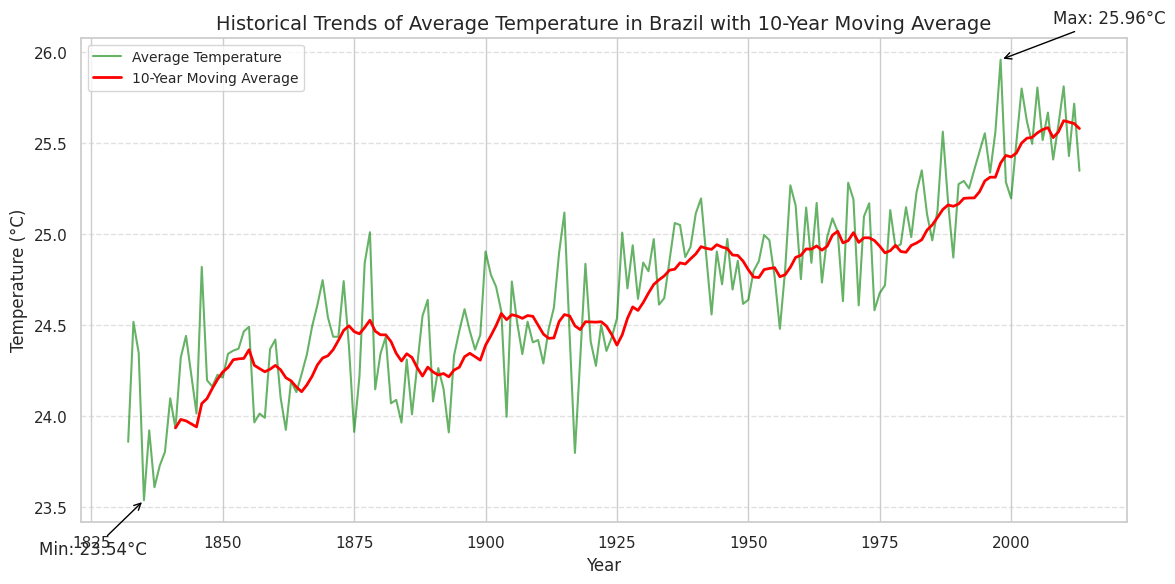

In [30]:
# Enhanced visualization of the temperature trend in Brazil with 10-Year Moving Average
plt.figure(figsize=(12, 6))

# Plot the original data and the 10-year moving average
plt.plot(annual_temp_brazil['Year'], annual_temp_brazil['AverageTemperature'], color='green', label='Average Temperature', alpha=0.6)
plt.plot(annual_temp_brazil['Year'], annual_temp_brazil['10-Year Moving Average'], color='red', linewidth=2, label='10-Year Moving Average')

# Highlight key points
max_temp = annual_temp_brazil.loc[annual_temp_brazil['AverageTemperature'].idxmax()]
min_temp = annual_temp_brazil.loc[annual_temp_brazil['AverageTemperature'].idxmin()]
plt.annotate(f'Max: {max_temp["AverageTemperature"]:.2f}°C',
             xy=(max_temp['Year'], max_temp['AverageTemperature']),
             xytext=(max_temp['Year'] + 10, max_temp['AverageTemperature'] + 0.2),
             arrowprops=dict(arrowstyle='->', color='black'))
plt.annotate(f'Min: {min_temp["AverageTemperature"]:.2f}°C',
             xy=(min_temp['Year'], min_temp['AverageTemperature']),
             xytext=(min_temp['Year'] - 20, min_temp['AverageTemperature'] - 0.3),
             arrowprops=dict(arrowstyle='->', color='black'))

# Add labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Historical Trends of Average Temperature in Brazil with 10-Year Moving Average', fontsize=14)
plt.legend(fontsize=10)

# Add horizontal gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 5 - Preprocessing</b></div>

In [31]:
data1 = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv")
data1

dt  AverageTemperature  AverageTemperatureUncertainty  \
0        1743-11-01               6.068                          1.737   
1        1743-12-01                 NaN                            NaN   
2        1744-01-01                 NaN                            NaN   
3        1744-02-01                 NaN                            NaN   
4        1744-03-01                 NaN                            NaN   
...             ...                 ...                            ...   
8599207  2013-05-01              11.464                          0.236   
8599208  2013-06-01              15.043                          0.261   
8599209  2013-07-01              18.775                          0.193   
8599210  2013-08-01              18.025                          0.298   
8599211  2013-09-01                 NaN                            NaN   

           City      Country Latitude Longitude  
0         Århus      Denmark   57.05N    10.33E  
1         Århus      Denmark   57.05N    10.33E  
2         Århus      Denmark   57.05N    10.33E  
3         Århus      Denmark   57.05N    10.33E  
4         Århus      Denmark   57.05N    10.33E  
...         ...          ...      ...       ...  
8599207  Zwolle  Netherlands   52.24N     5.26E  
8599208  Zwolle  Netherlands   52.24N     5.26E  
8599209  Zwolle  Netherlands   52.24N     5.26E  
8599210  Zwolle  Netherlands   52.24N     5.26E  
8599211  Zwolle  Netherlands   52.24N     5.26E  

[8599212 rows x 7 columns]

In [32]:
# Convert column 'dt' to datetime type and set as index
data1['dt'] = pd.to_datetime(data1['dt'])
data1 = data1.set_index('dt')

In [33]:
# Check the index and index type
print("Current DataFrame index:", data1.index)
print("Index data type:", type(data1.index))

# View the first few rows of the DataFrame to confirm that the index is a date
data1.head()

Current DataFrame index: DatetimeIndex(['1743-11-01', '1743-12-01', '1744-01-01', '1744-02-01',
               '1744-03-01', '1744-04-01', '1744-05-01', '1744-06-01',
               '1744-07-01', '1744-08-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='dt', length=8599212, freq=None)
Index data type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


AverageTemperature  AverageTemperatureUncertainty   City  Country  \
dt                                                                              
1743-11-01               6.068                          1.737  Århus  Denmark   
1743-12-01                 NaN                            NaN  Århus  Denmark   
1744-01-01                 NaN                            NaN  Århus  Denmark   
1744-02-01                 NaN                            NaN  Århus  Denmark   
1744-03-01                 NaN                            NaN  Århus  Denmark   

           Latitude Longitude  
dt                             
1743-11-01   57.05N    10.33E  
1743-12-01   57.05N    10.33E  
1744-01-01   57.05N    10.33E  
1744-02-01   57.05N    10.33E  
1744-03-01   57.05N    10.33E

In [34]:
# Sort the DataFrame by index (column 'dt')
data1 = data1.sort_index()

# Resample the data to a monthly frequency and fill gaps with interpolation
data_monthly = data1['AverageTemperature'].resample('MS').mean()

# Interpolate missing values ​​(optional, if you want a complete series)
data_monthly = data_monthly.interpolate(method='linear')

# Check the resampled data
print(data_monthly.head(20))

dt
1743-11-01     4.882424
1743-12-01     5.853425
1744-01-01     6.824427
1744-02-01     7.795429
1744-03-01     8.766431
1744-04-01     9.737433
1744-05-01    12.685514
1744-06-01    16.868296
1744-07-01    18.844524
1744-08-01    16.580563
1744-09-01    14.316602
1744-10-01     8.719062
1744-11-01     4.636592
1744-12-01     0.064351
1745-01-01    -2.257734
1745-02-01    -1.359476
1745-03-01     1.916215
1745-04-01     7.691365
1745-05-01     7.550074
1745-06-01     7.408783
Freq: MS, Name: AverageTemperature, dtype: float64


In [35]:
# Filter data from January 2013
data_monthly_2013 = data_monthly.loc['2013-01-01':]

# Check the result
print(data_monthly_2013.head())

dt
2013-01-01    11.567652
2013-02-01    13.144059
2013-03-01    15.551185
2013-04-01    18.668117
2013-05-01    21.748558
Freq: MS, Name: AverageTemperature, dtype: float64


In [36]:
# Remove missing values, if any
data_monthly = data_monthly.dropna()

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 6 - Test dickey-fuller</b></div>

In [37]:
from statsmodels.tsa.stattools import adfuller

# Perform the augmented Dickey-Fuller test
result = adfuller(data_monthly)

# Display results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f' {key}: {value}')

ADF Statistic: -2.437562665696112
p-value: 0.13141400346767929
Critical Values:
 1%: -3.432388161120837
 5%: -2.862440536429695
 10%: -2.5672493755233123


In [38]:
from statsmodels.tsa.stattools import adfuller

# Step 1: Perform the ADF test
result = adfuller(data_monthly)

# Step 2: Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:', key, value)

# Step 3: Interpret the results
if result[1] < 0.05:
    print("The series is stationary (reject the null hypothesis of a unit root).")
else:
    print("The series is not stationary (fail to reject the null hypothesis of a unit root).")

ADF Statistic: -2.437562665696112
p-value: 0.13141400346767929
Critical Values: 1% -3.432388161120837
Critical Values: 5% -2.862440536429695
Critical Values: 10% -2.5672493755233123
The series is not stationary (fail to reject the null hypothesis of a unit root).


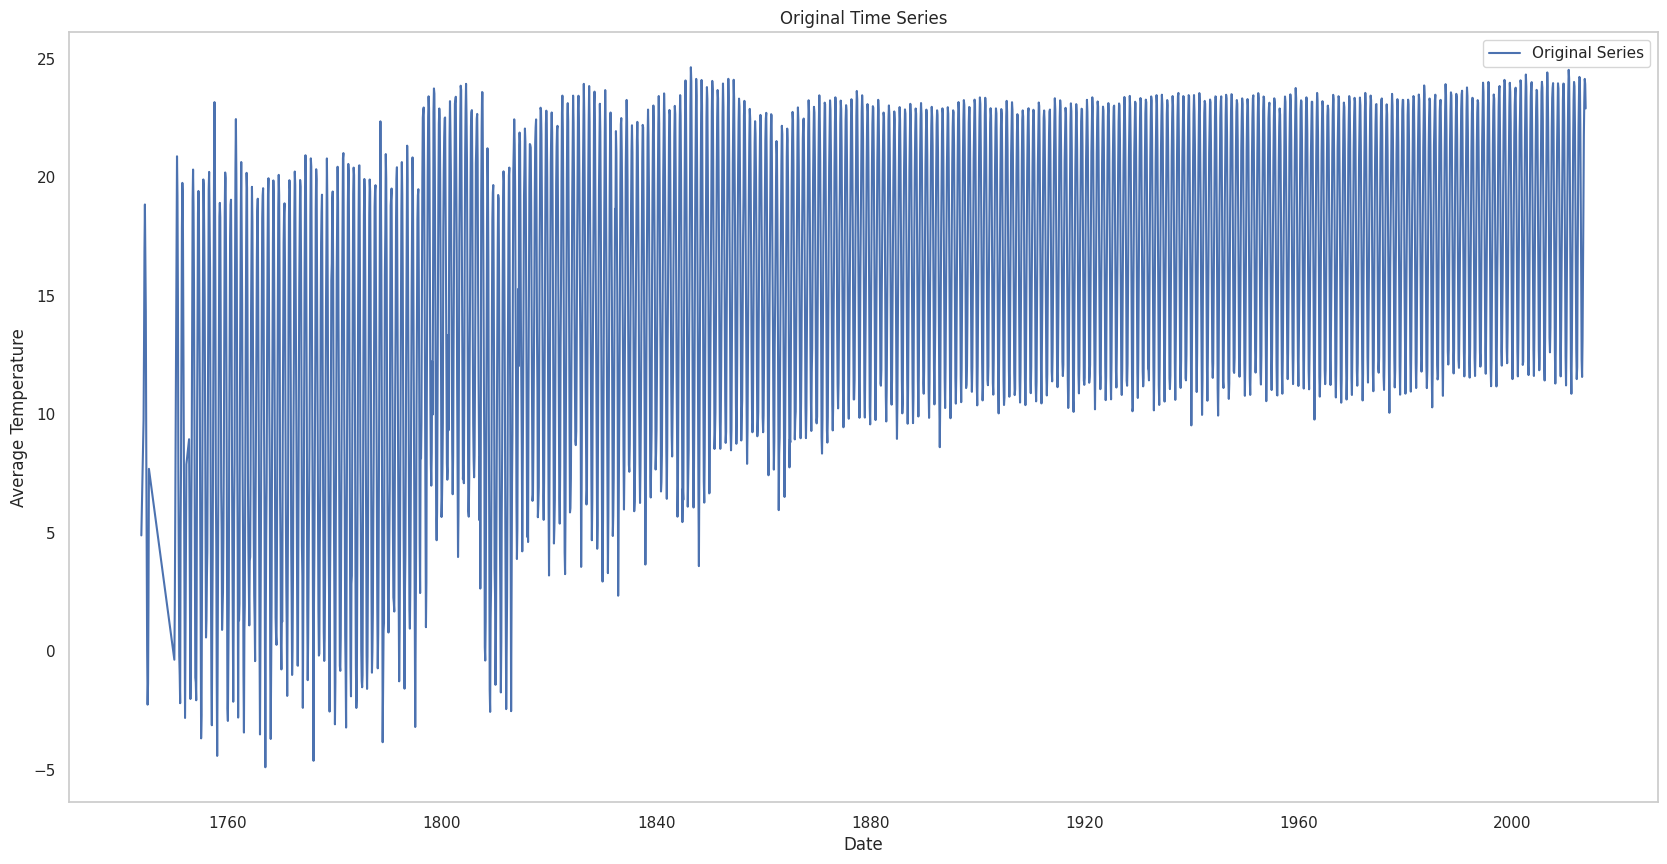

In [39]:
# Plot the original series
plt.figure(figsize=(20.5, 10))
plt.plot(data_monthly, label='Original Series')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid(False)
plt.show()

ADF Statistic (differenced): -12.434759726914923
p-value (differenced): 3.8692778585175366e-23
Critical Values: 1% -3.4323900686602644
Critical Values: 5% -2.8624413789638763
Critical Values: 10% -2.567249824072145
The differenced series is stationary (reject the null hypothesis of a unit root).


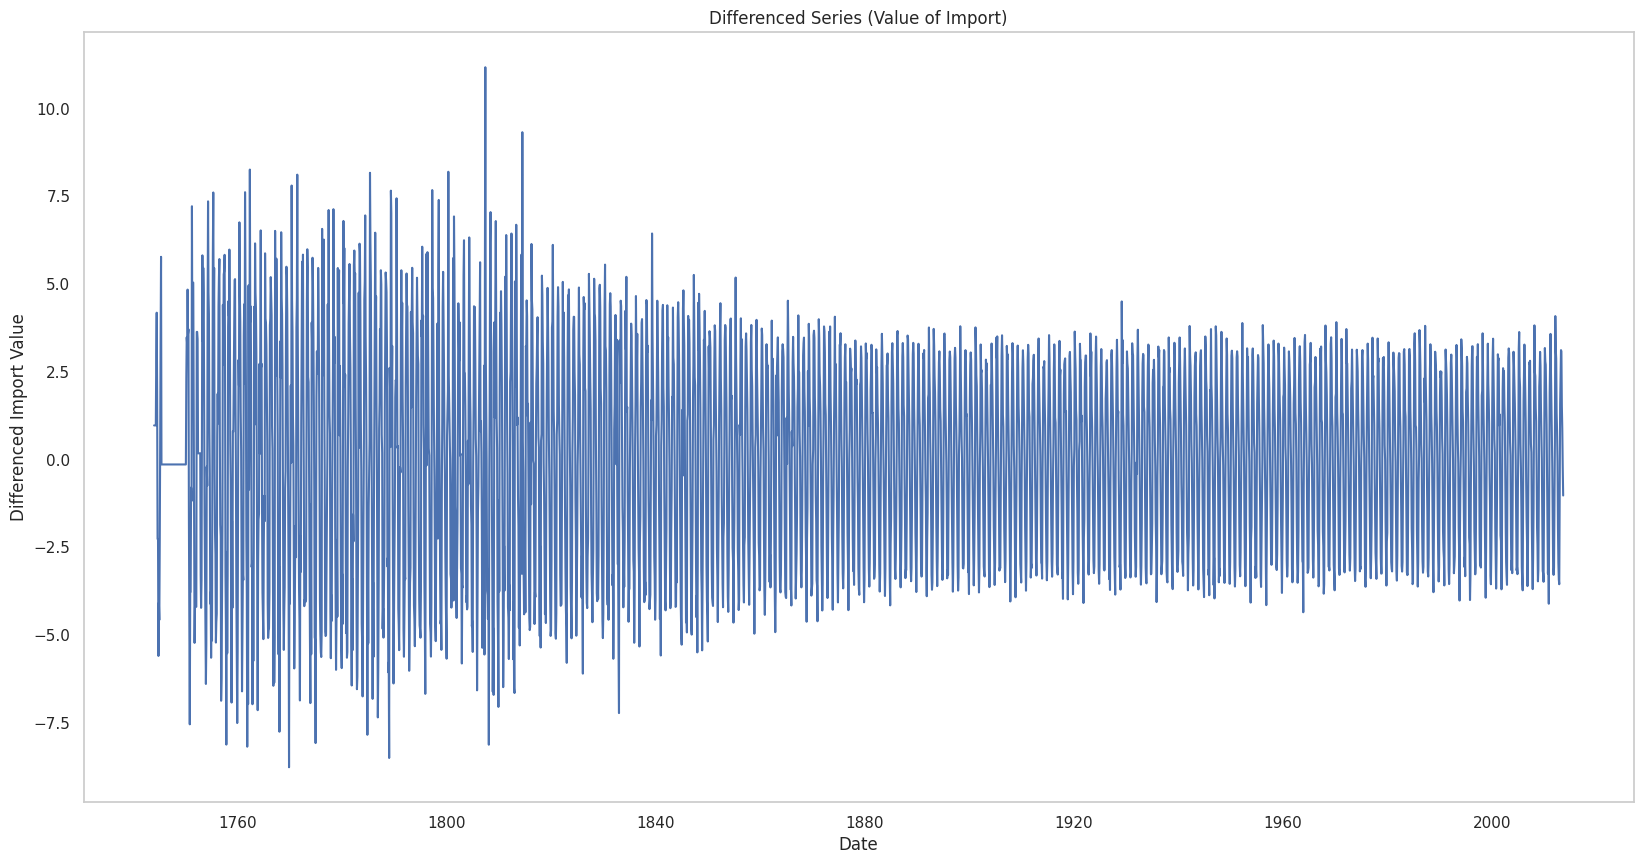

In [40]:
# Step 1: Apply first-order differencing
df_diff = data_monthly.diff().dropna()

# Step 2: Perform the ADF test on the differenced data
result_diff = adfuller(df_diff)

# Step 3: Print the test results
print('ADF Statistic (differenced):', result_diff[0])
print('p-value (differenced):', result_diff[1])
for key, value in result_diff[4].items():
    print('Critical Values:', key, value)

# Step 4: Interpret the results
if result_diff[1] < 0.05:
    print("The differenced series is stationary (reject the null hypothesis of a unit root).")
else:
    print("The differenced series is still not stationary (fail to reject the null hypothesis of a unit root).")

# Step 5: Plot the differenced series
plt.figure(figsize=(20, 10))
plt.plot(df_diff)
plt.title('Differenced Series (Value of Import)')
plt.xlabel('Date')
plt.ylabel('Differenced Import Value')
plt.grid()
plt.show()

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 6 - Checking time series</b></div>

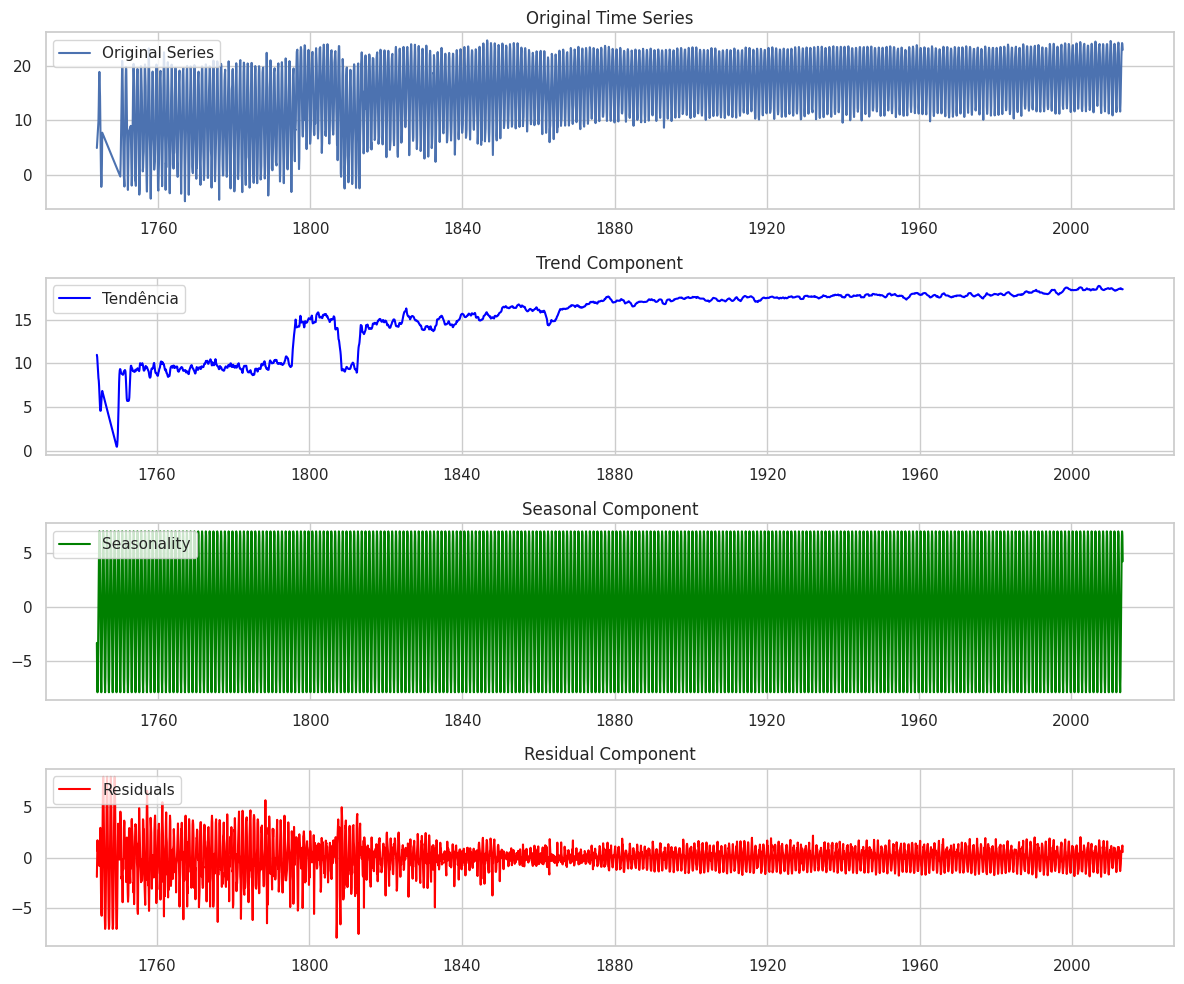

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
# Period = 12 for monthly seasonality
decomposition = seasonal_decompose(data_monthly, model='additive', period=12)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 10))

# Original Series
plt.subplot(4, 1, 1)
plt.plot(data_monthly, label='Original Series')
plt.legend(loc='upper left')
plt.title('Original Time Series')

# Trend
plt.subplot(4, 1, 2)
plt.plot(trend, label='Tendência', color='blue')
plt.legend(loc='upper left')
plt.title('Trend Component')

# Seasonality
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

# Residuals
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

# Section A) Models time series 

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 8 - AutoARIMA Model</b></div>

In [42]:
%%time

import pmdarima as pm

# Model autoarima ARIMA
# Fit auto ARIMA model (this will automatically apply differencing)
auto_arima_model = pm.auto_arima(data_monthly,
                                 seasonal=True, # Enables SARIMA if seasonality is detected
                                 m=12, # Seasonal period (e.g., 12 for monthly data)
                                 d=None, # Let auto_arima decide the differencing
                                 stepwise=True, # Stepwise search to reduce computation time
                                 suppress_warnings=True, # warning mensages
                                 trace=True) # Enables detailed output of the model search

# Print the summary of the model
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=9252.066, Time=18.54 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=16308.062, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=3.70 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=13388.266, Time=3.16 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=16306.074, Time=0.11 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=9652.766, Time=18.73 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=10186.161, Time=18.35 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=9228.227, Time=54.44 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=9968.905, Time=42.64 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=48.54 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=9286.194, Time=44.06 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=9362.618, Time=42.44 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=9275.833, Time=46.79 sec
 ARIMA(3,1,2)(2,0,1)[12] intercept   : AIC=9193.310, Time=54.57 sec
 ARIMA(3,1,2)(1

In [43]:
%%time
# Model autoarima SARIMA
# Fit auto ARIMA model, enabling seasonal SARIMA search
auto_sarima_model = pm.auto_arima(data_monthly, # Dataset 
                                  seasonal=True, # Enables SARIMA
                                  m=12, # Seasonal period (e.g., 12 for monthly data)
                                  d=None, # Automatic differencing for non-stationary data
                                  D=None, # Automatic seasonal differencing
                                  start_p=1, start_q=1, # Initial guess for AR and MA terms
                                  max_p=3, max_q=3, # Limits for AR and MA terms
                                  start_P=1, start_Q=1, # Initial guess for seasonal AR and MA terms
                                  max_P=2, max_Q=2, # Limits for seasonal AR and MA terms
                                  stepwise=True, # Stepwise search to reduce computation time
                                  suppress_warnings=True, # warning mensages
                                  trace=True) # Enables detailed output of the model search

# Print the summary of the model
print(auto_sarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=31.25 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=16308.062, Time=0.14 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=4.74 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=13388.266, Time=3.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=16306.074, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=14464.061, Time=0.44 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=9633.797, Time=9.66 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=11051.058, Time=4.45 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=9634.213, Time=22.78 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=9634.262, Time=26.37 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=12745.862, Time=8.73 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=10315.342, Time=10.09 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=9637.245, Time=26.71 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=9666.807, Time=6.65 sec
 ARIMA(0,1,2)(1,0

In [44]:
# Extract the best ARIMA/SARIMA parameters

# (p, d, q) for ARIMA
best_order = auto_arima_model.order
print("ARIMA",best_order)

ARIMA (2, 1, 3)


In [45]:
# (P, D, Q, m) for SARIMA
best_seasonal_order = auto_arima_model.seasonal_order  
print("SARIMA",best_seasonal_order)

SARIMA (2, 0, 2, 12)


# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 9 - Model ARIMA</b></div>

In [46]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model with the non-seasonal (p, d, q) parameters
arima_model = ARIMA(data_monthly, order=best_order)
arima_result = arima_model.fit()

# Print ARIMA model summary
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                 3239
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -4785.617
Date:                Wed, 06 Aug 2025   AIC                           9583.234
Time:                        13:56:59   BIC                           9619.730
Sample:                    11-01-1743   HQIC                          9596.311
                         - 09-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7286      0.001   1251.962      0.000       1.726       1.731
ar.L2         -0.9955      0.001   -709.047      0.000      -0.998      -0.993
ma.L1         -1.9039      0.009   -201.967      0.0

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 10 - Model SARIMA</b></div>

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model with both seasonal and non-seasonal parameters
sarima_model = SARIMAX(data_monthly, # database
                       order=best_order, # (p, d, q)
                       seasonal_order=best_seasonal_order)  # (P, D, Q, m)

# Fit model
sarima_result = sarima_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87620D+00    |proj g|=  2.42677D+00


 This problem is unconstrained.



At iterate    5    f=  1.43593D+00    |proj g|=  6.55113D-02

At iterate   10    f=  1.40147D+00    |proj g|=  3.33278D-02

At iterate   15    f=  1.38958D+00    |proj g|=  1.42284D-02

At iterate   20    f=  1.38678D+00    |proj g|=  1.20632D-02

At iterate   25    f=  1.38661D+00    |proj g|=  1.22432D-03

At iterate   30    f=  1.38636D+00    |proj g|=  4.74777D-03

At iterate   35    f=  1.38627D+00    |proj g|=  7.15470D-04

At iterate   40    f=  1.38627D+00    |proj g|=  6.33652D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     44     65      1     0     0   1.234D-04   1.386D+00
  F =   1.38626874666

In [48]:
# Print SARIMA model summary
print(sarima_result.summary())

                                        SARIMAX Results                                        
Dep. Variable:                      AverageTemperature   No. Observations:                 3239
Model:             SARIMAX(2, 1, 3)x(2, 0, [1, 2], 12)   Log Likelihood               -4490.124
Date:                                 Wed, 06 Aug 2025   AIC                           9000.249
Time:                                         13:57:51   BIC                           9061.076
Sample:                                     11-01-1743   HQIC                          9022.043
                                          - 09-01-2013                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6607      0.007    248.085      0.000       1.648       1

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 11 - Forecast time series models</b></div>

In [49]:
# Set the forecast horizon (e.g., next 12 months)
n_periods = 100
arima_forecast = arima_result.get_forecast(steps=n_periods)
arima_conf_int = arima_forecast.conf_int()

# Create a time index for the forecast
arima_forecast_index = pd.date_range(data_monthly.index[-1], periods=n_periods + 1, freq='M')[1:]

# Forecast with SARIMA model (next 12 months)
sarima_forecast = sarima_result.get_forecast(steps=n_periods)
sarima_conf_int = sarima_forecast.conf_int()

# Create a time index for the SARIMA forecast
sarima_forecast_index = pd.date_range(data_monthly.index[-1], periods=n_periods + 1, freq='M')[1:]
sarima_forecast_index

DatetimeIndex(['2013-10-31', '2013-11-30', '2013-12-31', '2014-01-31',
               '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-31',
               '2014-06-30', '2014-07-31', '2014-08-31', '2014-09-30',
               '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31',
               '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
               '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30',
               '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31',
               '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31',
               '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30',
               '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31',
               '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31',
               '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30',
               '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
      

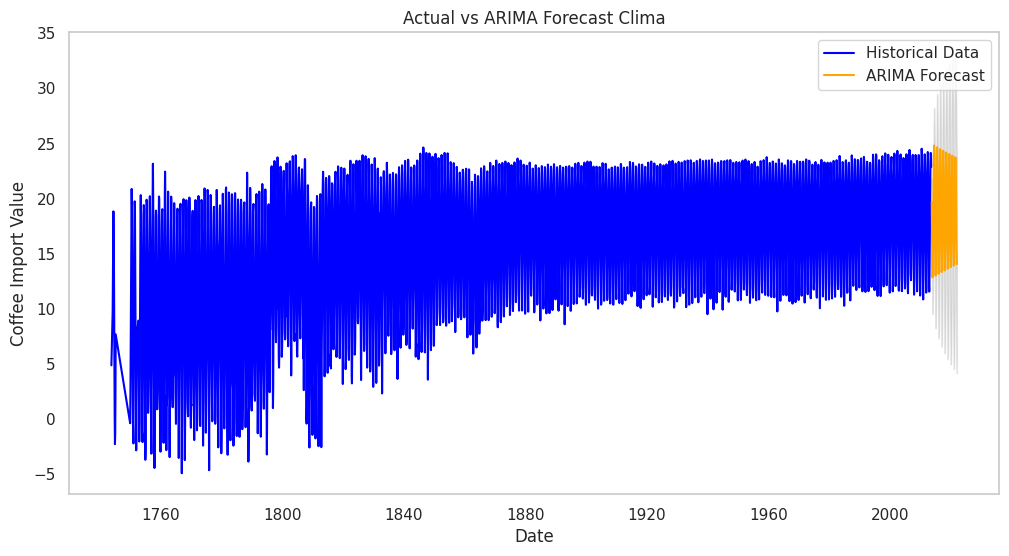

In [50]:
# Plot ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(data_monthly.index, data_monthly, label='Historical Data', color='blue')
plt.plot(arima_forecast_index, arima_forecast.predicted_mean, label='ARIMA Forecast', color='orange')

# Plot the confidence intervals
plt.fill_between(arima_forecast_index, arima_conf_int.iloc[:, 0], arima_conf_int.iloc[:, 1], color='gray', alpha=0.2)

# Add labels and title
plt.title('Actual vs ARIMA Forecast Clima')
plt.xlabel('Date')
plt.ylabel('Coffee Import Value')
plt.legend()
plt.grid(False)
plt.show()

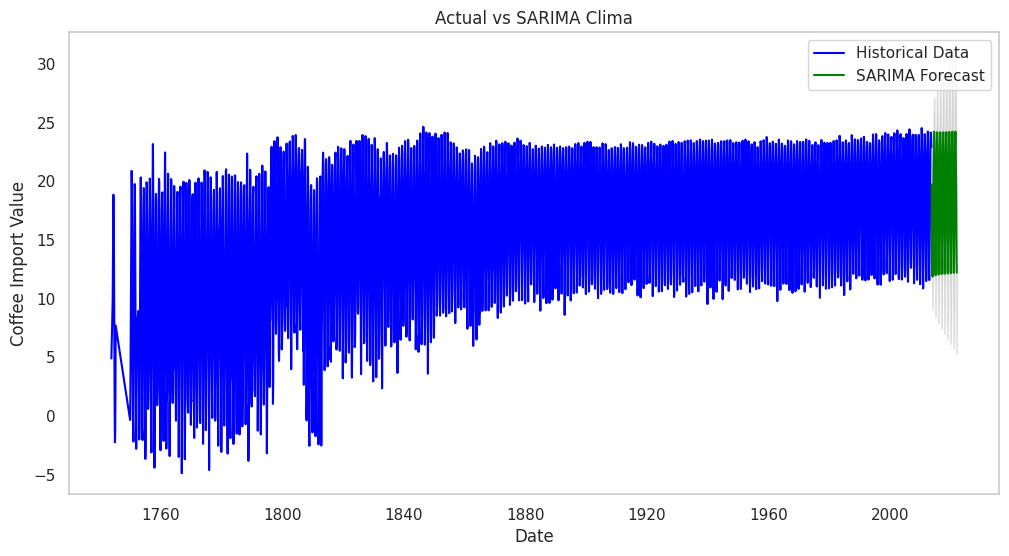

In [51]:
# Plot SARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(data_monthly.index, data_monthly, label='Historical Data', color='blue')
plt.plot(sarima_forecast_index, sarima_forecast.predicted_mean, label='SARIMA Forecast', color='green')

# Plot the confidence intervals
plt.fill_between(sarima_forecast_index, sarima_conf_int.iloc[:, 0], sarima_conf_int.iloc[:, 1], color='gray', alpha=0.2)

# Add labels and title
plt.title('Actual vs SARIMA Clima')
plt.xlabel('Date')
plt.ylabel('Coffee Import Value')
plt.legend()
plt.grid(False)
plt.show()

# Section B) Linear regression models

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 12 - Models regression linear</b></div>

In [52]:
# Suppose `data_monthly_brazil` is the time series with date index and average temperature values
data = data_monthly.to_frame() # Convert to DataFrame

# Create lag variables
data['lag_1'] = data['AverageTemperature'].shift(1)
data['lag_2'] = data['AverageTemperature'].shift(2)
data['lag_3'] = data['AverageTemperature'].shift(3)

# Remove null values ​​generated by shift
data.dropna(inplace=True)

In [53]:
# Define the features (X) and the target variable (y)
X = data[['lag_1', 'lag_2', 'lag_3']]
y = data['AverageTemperature']

In [54]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
# Split the data into training and testing (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [55]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Initialize XGBRegressor with GPU parameters
xgboost_model = XGBRegressor(objective='reg:squarederror',  # Objective for regression
                             n_estimators=1000,             # Increase the number of trees (epochs) for monitoring
                             learning_rate=0.1,             # Learning rate (step size shrinkage)
                             max_depth=6,                   # Maximum depth of each tree (controls model complexity)
                             subsample=0.8,                 # Subsample ratio of training instances
                             colsample_bytree=0.8,          # Subsample ratio of features when constructing each tree
                             gamma=0,                       # Minimum loss reduction required to make a split
                             reg_alpha=0.01,                # L1 regularization (Lasso)
                             reg_lambda=1,                  # L2 regularization (Ridge)
                             min_child_weight=1,            # Minimum sum of instance weight needed in a child node
                             booster='gbtree',              # Use tree-based boosters (default)
                             random_state=42,               # Seed for reproducibility
                             verbosity=1                   # Verbosity level of model training output (set to 1 for warnings)
                            )

# Define evaluation set
eval_set = [(X_train, y_train), (X_test, y_test)]

# Train the model with evaluation metric and early stopping
xgboost_model.fit(X_train, y_train, # Fit model
                  eval_metric="rmse", # Metric to be monitored
                  eval_set=eval_set, # Evaluation set for monitoring
                  early_stopping_rounds=10, # Stop if no improvement after 10 rounds
                  verbose=True # Output training information at each epoch
                 )

[0]	validation_0-rmse:6.16820	validation_1-rmse:5.17053
[1]	validation_0-rmse:5.59016	validation_1-rmse:4.70818
[2]	validation_0-rmse:5.12108	validation_1-rmse:4.32887
[3]	validation_0-rmse:4.65068	validation_1-rmse:3.95849
[4]	validation_0-rmse:4.22888	validation_1-rmse:3.63097
[5]	validation_0-rmse:3.89176	validation_1-rmse:3.36061
[6]	validation_0-rmse:3.59093	validation_1-rmse:3.12163
[7]	validation_0-rmse:3.27864	validation_1-rmse:2.87674
[8]	validation_0-rmse:3.00463	validation_1-rmse:2.65805
[9]	validation_0-rmse:2.79320	validation_1-rmse:2.49783
[10]	validation_0-rmse:2.60245	validation_1-rmse:2.34711
[11]	validation_0-rmse:2.43712	validation_1-rmse:2.21527
[12]	validation_0-rmse:2.25811	validation_1-rmse:2.07577
[13]	validation_0-rmse:2.12946	validation_1-rmse:1.97737
[14]	validation_0-rmse:1.98441	validation_1-rmse:1.86515
[15]	validation_0-rmse:1.88929	validation_1-rmse:1.79122
[16]	validation_0-rmse:1.77484	validation_1-rmse:1.70463
[17]	validation_0-rmse:1.70513	validation

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [56]:
# Make predictions on the test set
y_pred = xgboost_model.predict(X_test)

In [57]:
# Calculate residuals
residuals = y_test - y_pred

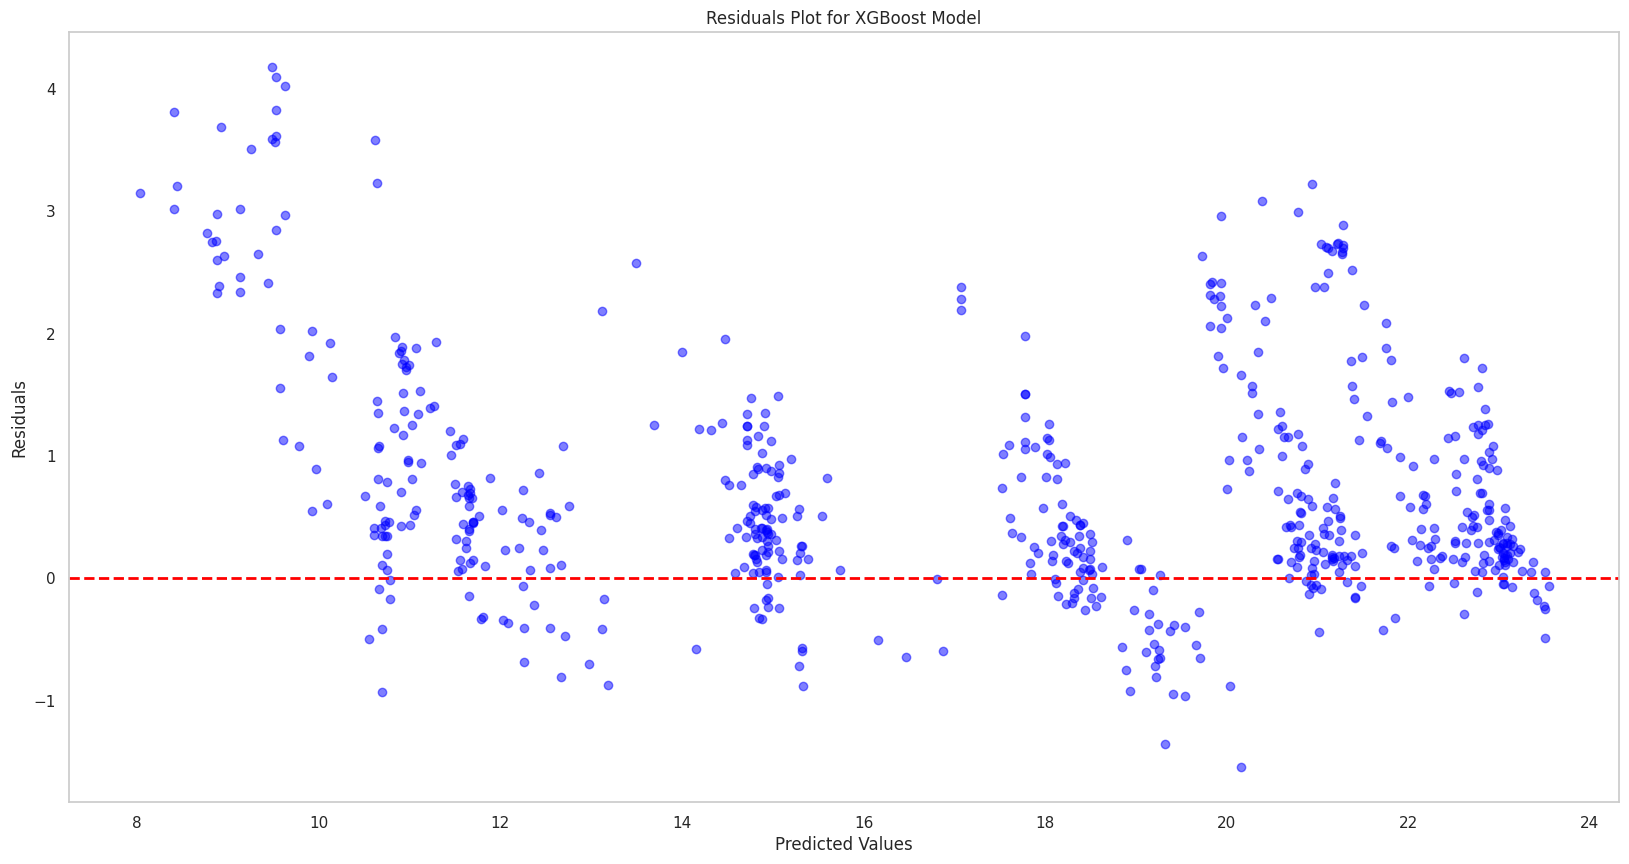

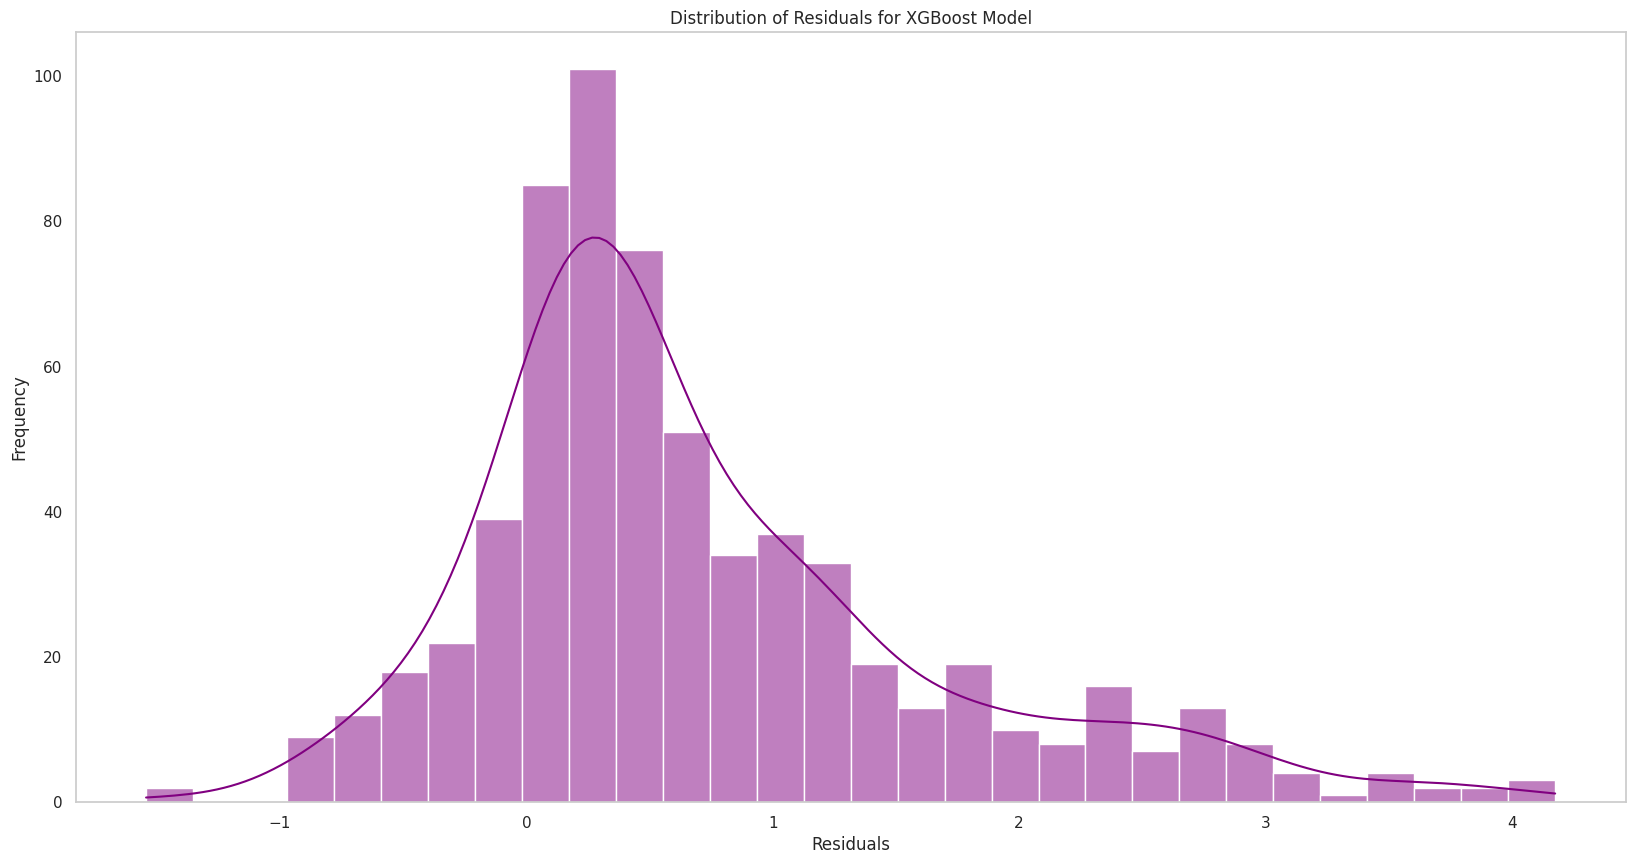

In [58]:
# Plot residuals scatter plot
plt.figure(figsize=(20, 10))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot for XGBoost Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(False)
plt.show()

# Plot distribution of residuals (Histogram)
plt.figure(figsize=(20, 10))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Distribution of Residuals for XGBoost Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [59]:
# Number of future periods to predict
n_periods = 120

# List to store future predictions
future_predictions = []

# Initialize lag values ​​with the last known values ​​from the test set
last_known_lags = [y_test.values[-1], X_test['lag_1'].values[-1], X_test['lag_2'].values[-1]]

# Iteratively predict each future period
for _ in range(n_periods):
    
    # Create a DataFrame with the current lags
    future_input = np.array(last_known_lags).reshape(1, -1)

    # Predict the next period using XGBoost
    next_prediction = xgboost_model.predict(future_input)[0]
    future_predictions.append(next_prediction)

    # Update the lags for next iteration
    last_known_lags = [next_prediction] + last_known_lags[:2] # Update with latest predicted value

# Convert future predictions to a series with appropriate dates
future_index = pd.date_range(start=y_test.index[-1] + pd.DateOffset(1), periods=n_periods, freq='M')
future_series = pd.Series(future_predictions, index=future_index)

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 12 - Forest Model XGBoost </b></div>

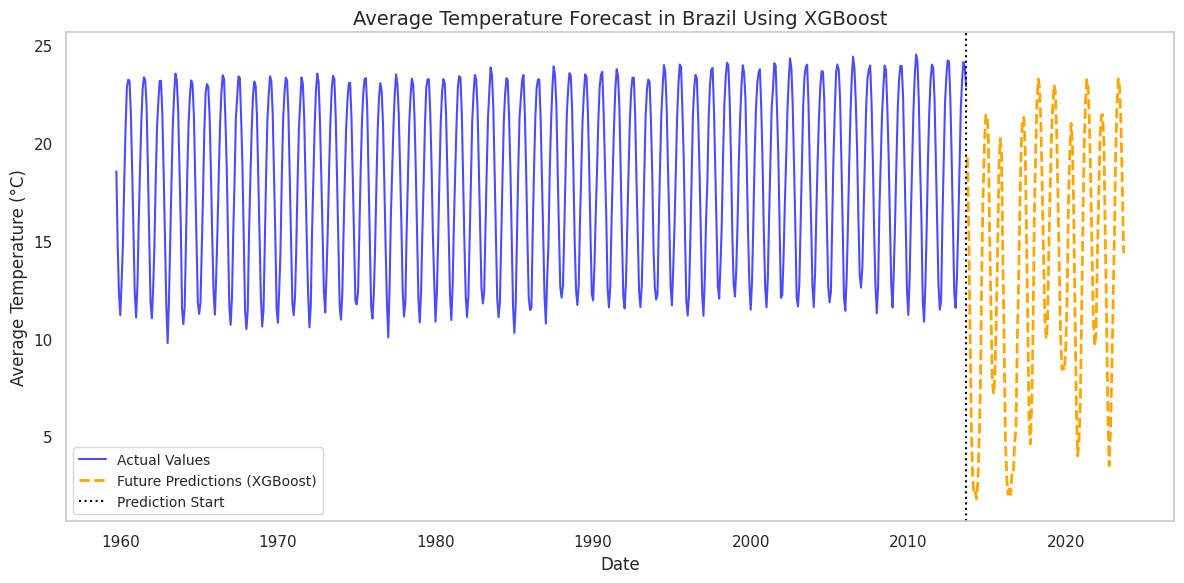

In [60]:
# Enhanced visualization of temperature forecast using XGBoost
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(y_test.index, y_test, label='Actual Values', color='blue', alpha=0.7)

# Plot future predictions
plt.plot(future_series.index, future_series, color='orange', linestyle='--', label='Future Predictions (XGBoost)', linewidth=2)

# Highlight the transition point with a vertical line
plt.axvline(x=y_test.index[-1], color='black', linestyle=':', label='Prediction Start')

# Add labels, title, and legend
plt.title('Average Temperature Forecast in Brazil Using XGBoost', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.legend(fontsize=10)

# Add horizontal gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()

# Show the plot
plt.grid(False)
plt.show()

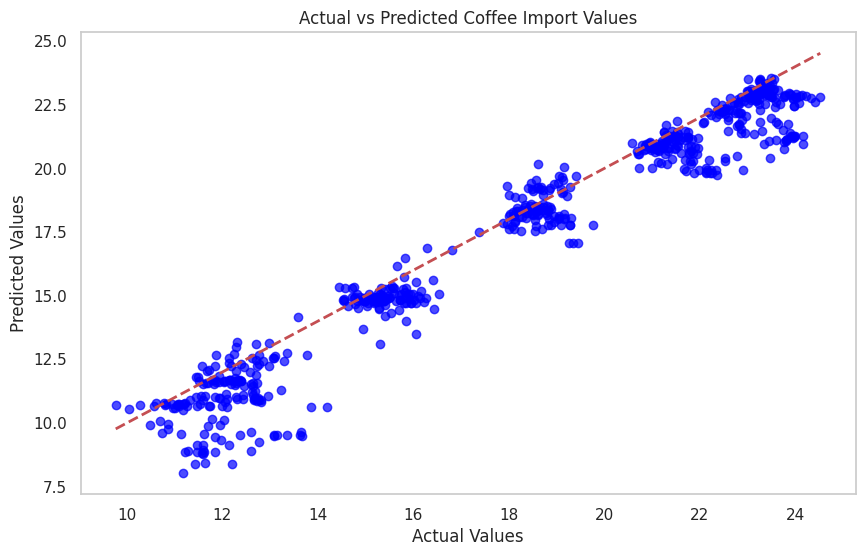

In [61]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Coffee Import Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(False)
plt.show()

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model name (you can adjust this to reflect the actual model used)
model_name = 'XGBoost'

# Predict values using the trained model
y_pred = xgboost_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Organize the metrics into a dictionary with the model name
metrics = {
    'Model': [model_name],  # Name of the model
    'RMSE': [rmse],         # Root Mean Squared Error
    'MAE': [mae],           # Mean Absolute Error
    'MSE': [mse],           # Mean Squared Error
    'R²': [r2]              # R-squared (coefficient of determination)
}

# Convert the dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame with the metrics
metrics_df

Model      RMSE       MAE     MSE        R²
0  XGBoost  1.176563  0.828663  1.3843  0.928228

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 14 - Model LightGBM </b></div>

In [63]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Initialize LightGBM with GPU parameters
lgb_model = lgb.LGBMRegressor(
    objective='regression',          # Objective for regression
    n_estimators=1000,               # Number of trees (iterations)
    learning_rate=0.1,               # Learning rate
    max_depth=10,                     # Maximum depth of trees
    subsample=0.8,                   # Subsampling for the rows
    colsample_bytree=0.8,            # Subsampling for the columns
    reg_alpha=0.01,                  # L1 regularization
    reg_lambda=1,                    # L2 regularization
    min_child_weight=1,              # Minimum sum of instance weight in a child
    random_state=42                  # For reproducibility
)

# Define evaluation set (training and validation sets)
eval_set = [(X_train, y_train), (X_test, y_test)]

# Train the LightGBM model with epoch tracking and early stopping
lgb_model.fit(
    X_train, 
    y_train, 
    eval_set=eval_set,                # Set of data to evaluate performance
    eval_metric='rmse'               # Evaluation metric: Root Mean Squared Error (RMSE)
)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 2588, number of used features: 3
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 14.485950
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

LGBMRegressor(colsample_bytree=0.8, max_depth=10, min_child_weight=1,
              n_estimators=1000, objective='regression', random_state=42,
              reg_alpha=0.01, reg_lambda=1, subsample=0.8)

In [64]:
# Make predictions on the test set
y_pred_test = lgb_model.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [65]:
# Calculate residuals
residuals_lgb = y_test - y_pred_test

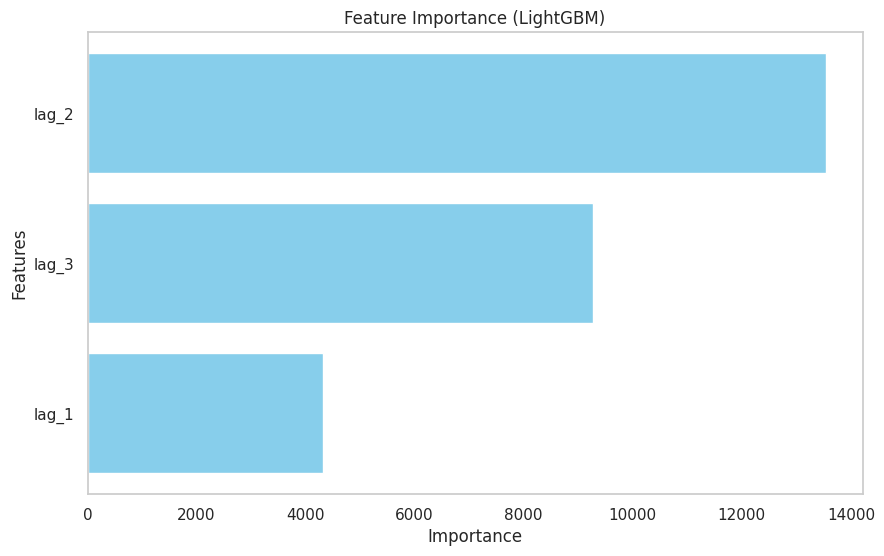

In [66]:
# Get feature importances from the trained LightGBM model
feature_importances = lgb_model.feature_importances_

# Assuming your feature names are stored in a list (e.g., if X_train is a DataFrame)
feature_names = X_train.columns

# Create a DataFrame to organize feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance (LightGBM)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.grid(False)
plt.show()

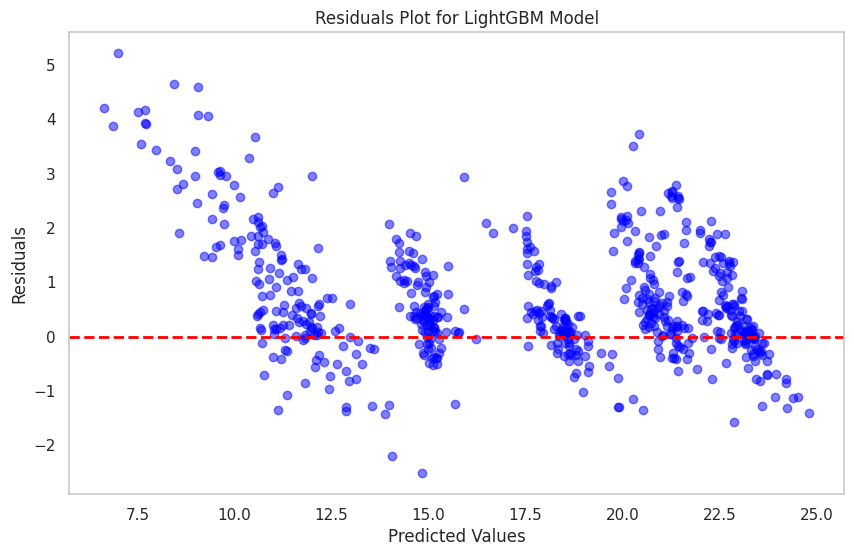

In [67]:
# Plot residuals scatter plot (Residuals vs Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals_lgb, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot for LightGBM Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(False)
plt.show()

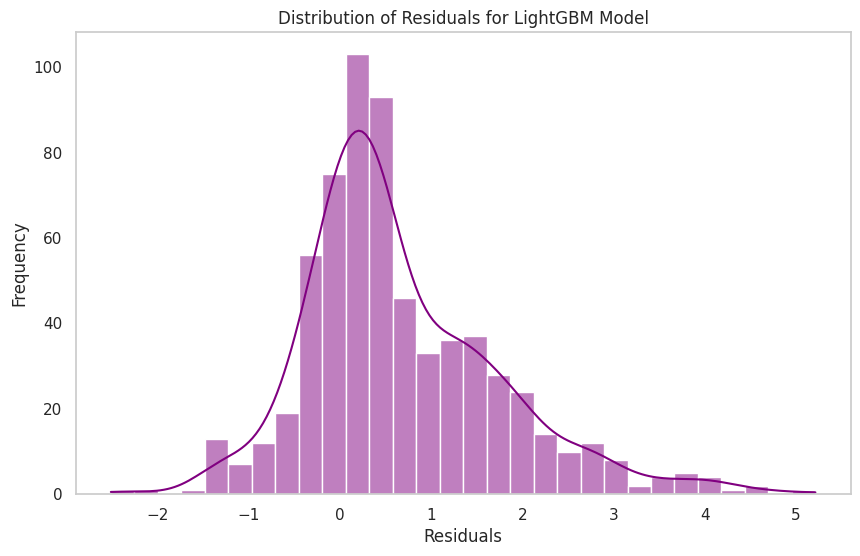

In [68]:
# Plot distribution of residuals (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(residuals_lgb, bins=30, kde=True, color='purple')
plt.title('Distribution of Residuals for LightGBM Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

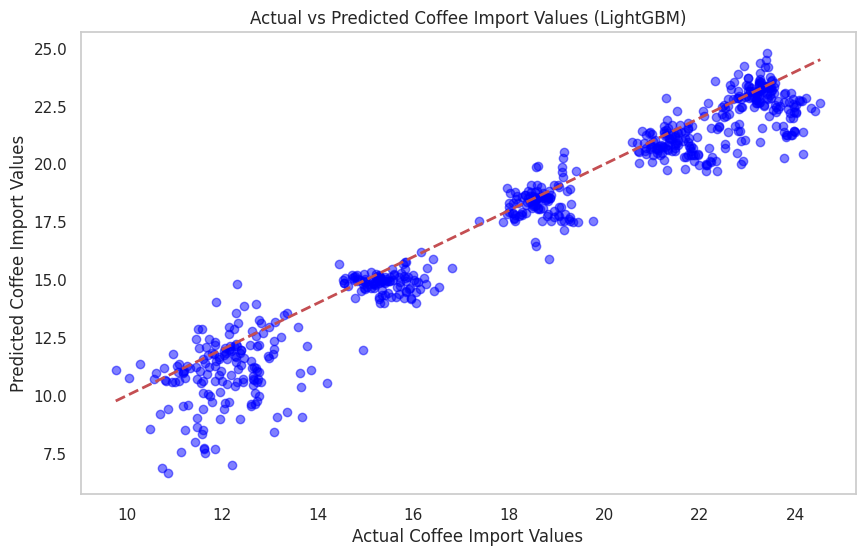

In [69]:
# Plot Actual vs Predicted values using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Add 45-degree reference line

# Add labels and title
plt.title('Actual vs Predicted Coffee Import Values (LightGBM)')
plt.xlabel('Actual Coffee Import Values')
plt.ylabel('Predicted Coffee Import Values')
plt.grid(False)
plt.show()

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 15 - Forest Model LightGBM </b></div>

In [70]:
# Verify that y_pred_test is set correctly
print("Predictions on test set completed:", y_pred_test[:10])

Predictions on test set completed: [18.1833754  14.98629318 11.71489781 10.98276834 11.63205955 15.21500348
 18.75585064 20.0346606  22.46108674 23.50745483]


In [71]:
# Check the number of future periods we want to predict (e.g. 24)
n_periods = 150
future_predictions = []

# Initialize the lag values ​​with the last known values ​​from the test set
last_known_lags = [y_test.values[-1], X_test['lag_1'].values[-1], X_test['lag_2'].values[-1]]

# Iterative forecasts for each future period
for _ in range(n_periods):
    
    # Create a DataFrame with the current lags
    future_input = np.array(last_known_lags).reshape(1, -1)
    
    # Forecast the next period using LightGBM
    next_prediction = lgb_model.predict(future_input)[0]
    future_predictions.append(next_prediction)
    
    # Update the lags for the next iteration
    last_known_lags = [next_prediction] + last_known_lags[:2]  

# Convert future predictions into a series with appropriate dates
future_index = pd.date_range(start=y_test.index[-1] + pd.DateOffset(1), periods=n_periods, freq='M')
future_series = pd.Series(future_predictions, index=future_index)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

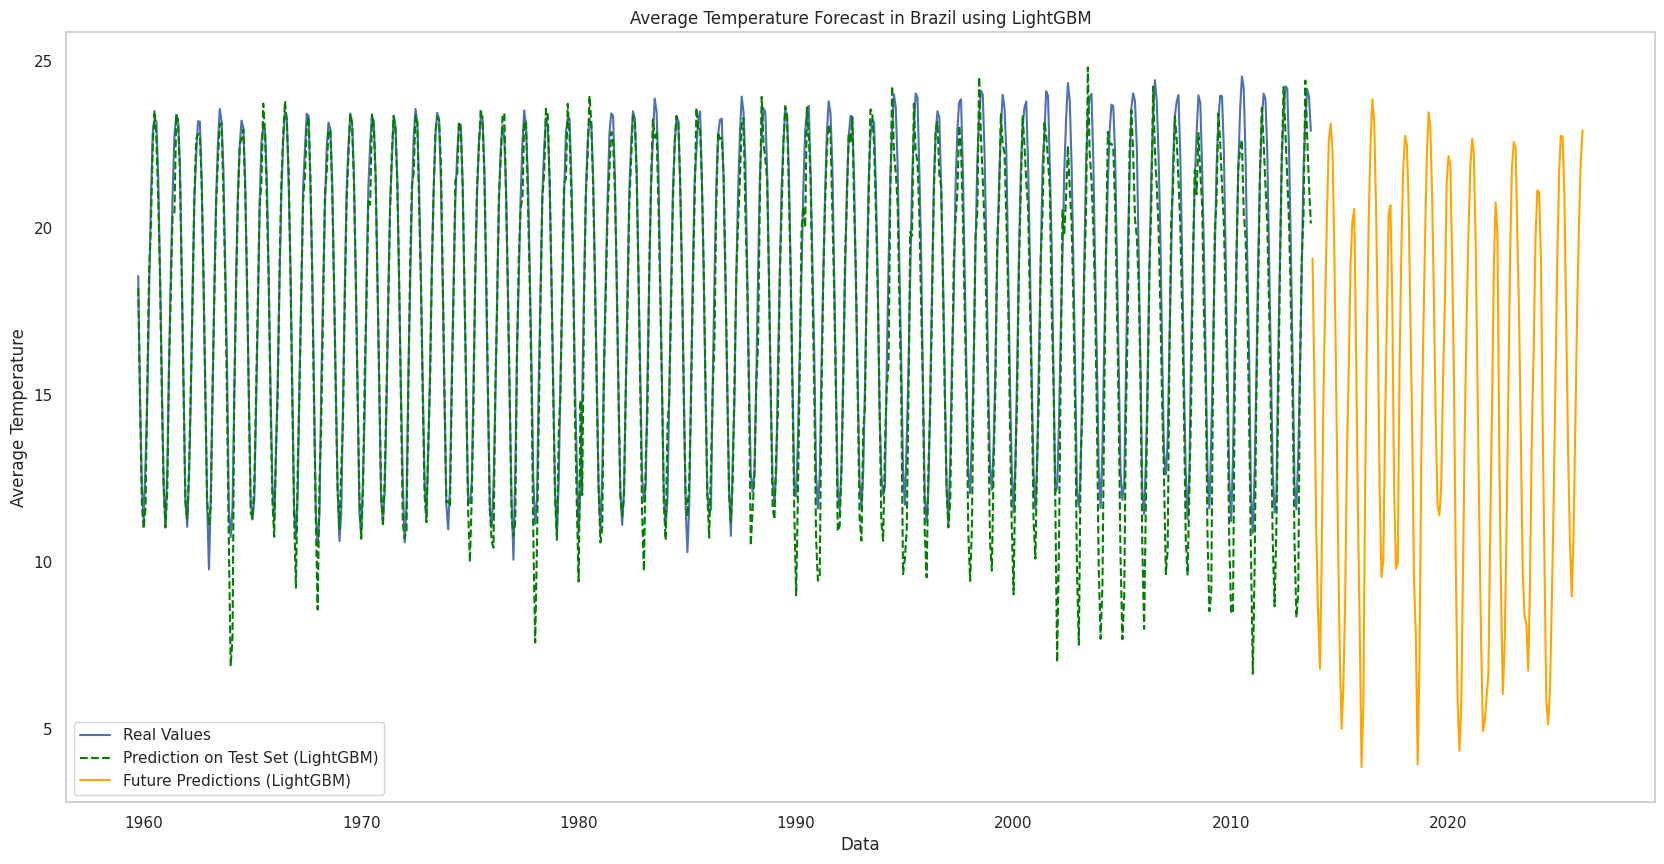

In [72]:
# Plot the predictions
plt.figure(figsize=(20.5, 10))
plt.plot(y_test.index, y_test, label='Real Values')
plt.plot(y_test.index, y_pred_test, color='green', linestyle='--', label='Prediction on Test Set (LightGBM)')
plt.plot(future_series.index, future_series, color='orange', label='Future Predictions (LightGBM)')
plt.title('Average Temperature Forecast in Brazil using LightGBM')
plt.xlabel('Data')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid(False)
plt.show()

In [73]:
# Calculate metrics
mae_lgb = mean_absolute_error(y_test, y_pred_test)
mse_lgb = mean_squared_error(y_test, y_pred_test)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_test)

# Create DataFrame with metrics
metrics_lgb = {
               'Model': ['LightGBM'],
               'RMSE': [rmse_lgb],
               'MAE': [mae_lgb],
               'MSE': [mse_lgb],
               'R²': [r2_lgb]
              }

# Convert dictionary to DataFrame
metrics_lgb_df = pd.DataFrame(metrics_lgb)

# Display the DataFrame
metrics_lgb_df

Model      RMSE      MAE      MSE       R²
0  LightGBM  1.269508  0.89449  1.61165  0.91644